In [41]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits import mplot3d
import seaborn as sns
import numpy as np
import pytry
import pickle
import glob
import pandas as pd
import os
import random
import copy

from scipy import stats
import researchpy as rp
from scipy.stats import norm, ttest_ind, f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison
from statsmodels.graphics.factorplots import interaction_plot
from math import sqrt

import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, classification_report, precision_score
from sklearn.dummy import DummyClassifier
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

Load Data.

In [3]:
lrraw = pd.read_pickle("../Data/Output/lrraw.pkl") #logistic regression without lmus
lrlmu = pd.read_pickle("../Data/Output/lrlmu.pkl") #logistic regression with lmus
mlpraw = pd.read_pickle("../Data/Output/mlpraw.pkl") #mlp without lmus
mlplmu = pd.read_pickle("../Data/Output/mlplmu.pkl") #mlp without lmus

# Performance on Trained Classes

## Frame-By-Frame

**Get classifier outputs for high and low engagement frames**

Logistic Regression without LMUs

In [4]:
lrraw_highframes=[]
lrraw_lowframes=[]
for i in range(20):
    a=np.vstack(lrraw['prediction_prob_high'][i])
    lrraw_highframes.append(a)
    
    b=np.vstack(lrraw['prediction_prob_low'][i])
    lrraw_lowframes.append(b)
    
lrraw_highframes_all = np.vstack(lrraw_highframes)
lrraw_lowframes_all = np.vstack(lrraw_lowframes)

Logistic Regression with LMUs

In [5]:
lrlmu_highframes=[]
lrlmu_lowframes=[]
for i in range(20):
    a=np.vstack(lrlmu['prediction_prob_high'][i])
    lrlmu_highframes.append(a)
    
    b=np.vstack(lrlmu['prediction_prob_low'][i])
    lrlmu_lowframes.append(b)
    
lrlmu_highframes_all = np.vstack(lrlmu_highframes)
lrlmu_lowframes_all = np.vstack(lrlmu_lowframes)

MLP without LMUs

In [6]:
mlpraw_highframes=[]
mlpraw_lowframes=[]
for i in range(20):
    a=np.vstack(mlpraw['decision_high'][i])
    mlpraw_highframes.append(a)
    
    b=np.vstack(mlpraw['decision_low'][i])
    mlpraw_lowframes.append(b)
    
mlpraw_highframes_all = np.vstack(mlpraw_highframes)
mlpraw_lowframes_all = np.vstack(mlpraw_lowframes)

MLP with LMUs

In [7]:
mlplmu_highframes=[]
mlplmu_lowframes=[]
for i in range(20):
    a=np.vstack(mlplmu['decision_high'][i])
    mlplmu_highframes.append(a)
    
    b=np.vstack(mlplmu['decision_low'][i])
    mlplmu_lowframes.append(b)
    
mlplmu_highframes_all = np.vstack(mlplmu_highframes)
mlplmu_lowframes_all = np.vstack(mlplmu_lowframes)

**Now we look at the distribution of classification values given to frames from each type of clip.** <br>
Also calculate the percentage of frames which were given the correct classification. <br>
For high engagement clips, correct = 1. <br>
For low engagement, correct = 0.

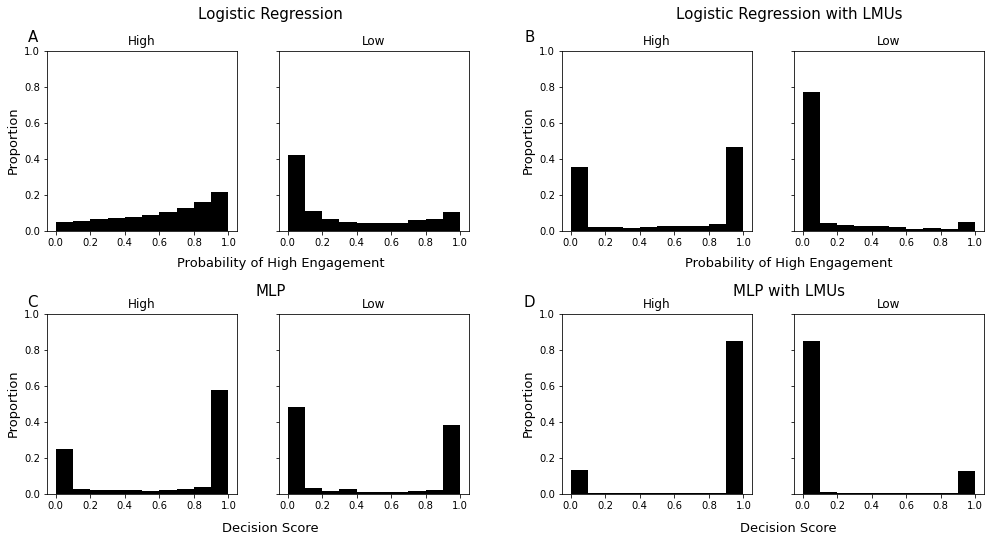

In [8]:
bins=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

#plot histograms - x-axis = classifier output, y-axis = count
fig = plt.figure(figsize=(15, 8))
outer = gridspec.GridSpec(2, 2)
lrrplot = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=outer[0])
lrlplot = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=outer[1])
mlprplot = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=outer[2])
mlplplot = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=outer[3])

fig.text(0.29, 0.94, 'Logistic Regression', ha='center', fontsize=15)
ax1 = fig.add_subplot(lrrplot[0, 0])
ax1.hist(lrraw_highframes_all[:,1], bins=bins, color='black', 
         weights=np.ones(len(lrraw_highframes_all[:,1])) / len(lrraw_highframes_all[:,1]))
ax1.title.set_text('High')
ax1.set_ylim([0, 1.0])
ax1.set_ylabel('Proportion', fontsize=13)
ax2 = fig.add_subplot(lrrplot[0, 1], sharey=ax1)
ax2.hist(lrraw_lowframes_all[:,1], bins=bins, color='black', 
         weights=np.ones(len(lrraw_lowframes_all[:,1])) / len(lrraw_lowframes_all[:,1]))
ax2.title.set_text('Low')
plt.setp(ax2.get_yticklabels(), visible=False)

fig.text(0.3, 0.51, 'Probability of High Engagement', ha='center', fontsize=13)

fig.text(0.77, 0.94, 'Logistic Regression with LMUs', ha='center', fontsize=15)
ax3 = fig.add_subplot(lrlplot[0, 0])
ax3.hist(lrlmu_highframes_all[:,1], bins=bins, color='black', 
         weights=np.ones(len(lrlmu_highframes_all[:,1])) / len(lrlmu_highframes_all[:,1]))
ax3.title.set_text('High')
ax3.set_ylabel('Proportion', fontsize=13)
ax3.set_ylim([0, 1.0])
ax4 = fig.add_subplot(lrlplot[0, 1], sharey=ax3)
ax4.hist(lrlmu_lowframes_all[:,1], bins=bins, color='black', 
         weights=np.ones(len(lrlmu_lowframes_all[:,1])) / len(lrlmu_lowframes_all[:,1]))
ax4.title.set_text('Low')
plt.setp(ax4.get_yticklabels(), visible=False)

fig.text(0.77, 0.51, 'Probability of High Engagement', ha='center', fontsize=13)

fig.text(0.29, 0.46, 'MLP', ha='center', fontsize=15)
ax5 = fig.add_subplot(mlprplot[0, 0])
ax5.hist(mlpraw_highframes_all, bins=bins, color='black', 
         weights=np.ones(len(mlpraw_highframes_all)) / len(mlpraw_highframes_all))
ax5.title.set_text('High')
ax5.set_ylabel('Proportion', fontsize=13)
ax5.set_ylim([0, 1.0])
ax6 = fig.add_subplot(mlprplot[0, 1], sharey=ax5)
ax6.hist(mlpraw_lowframes_all, bins=bins, color='black', 
         weights=np.ones(len(mlpraw_lowframes_all)) / len(mlpraw_lowframes_all))
ax6.title.set_text('Low')
plt.setp(ax6.get_yticklabels(), visible=False)

fig.text(0.29, 0.05, 'Decision Score', ha='center', fontsize=13)

fig.text(0.77, 0.46, 'MLP with LMUs', ha='center', fontsize=15)
ax7 = fig.add_subplot(mlplplot[0, 0])
ax7.hist(mlplmu_highframes_all, bins=bins, color='black', 
         weights=np.ones(len(mlplmu_highframes_all)) / len(mlplmu_highframes_all))
ax7.title.set_text('High')
ax7.set_ylabel('Proportion', fontsize=13)
ax7.set_ylim([0, 1.0])
ax8 = fig.add_subplot(mlplplot[0, 1], sharey=ax7)
ax8.hist(mlplmu_lowframes_all, bins=bins, color='black', 
         weights=np.ones(len(mlplmu_lowframes_all)) / len(mlplmu_lowframes_all))
ax8.title.set_text('Low')
plt.setp(ax8.get_yticklabels(), visible=False)

fig.text(0.77, 0.05, 'Decision Score', ha='center', fontsize=13)
fig.tight_layout(pad=5.0)

fig.text(0.07, 0.9, 'A', ha='center', fontsize=15)
fig.text(0.53, 0.9, 'B', ha='center', fontsize=15)
fig.text(0.07, 0.44, 'C', ha='center', fontsize=15)
fig.text(0.53, 0.44, 'D', ha='center', fontsize=15)

fig.savefig('../Figs/framehist.png')

In [9]:
print(len(lrraw_highframes_all[:,1]))
print(len(lrraw_lowframes_all[:,1]))
print(len(lrlmu_highframes_all[:,1]))
print(len(lrlmu_lowframes_all[:,1]))
print(len(mlpraw_highframes_all))
print(len(mlpraw_lowframes_all))
print(len(mlplmu_highframes_all))
print(len(mlplmu_lowframes_all))

794184
207414
765572
207405
792890
226601
878720
221186


**Calculate mean percent of high and low frames classified correctly by each approach.**

Logistic Regression without LMUs

In [10]:
#Create list of how many frames were correctly classified in each experiment
high_counts=[]
low_counts=[]
for i in range(20):
    (nh, bins, plot) = ax1.hist(np.vstack(lrraw['prediction_prob_high'][i]), bins=bins)
    high_counts.append(nh)
    (nl, bins, plot) = ax2.hist(np.vstack(lrraw['prediction_prob_low'][i]), bins=bins)
    low_counts.append(nl)
    
high_cor = [item[1][9] for item in high_counts] #no. high frames classified correctly in each experiment
high_len = [sum(item[1]) for item in high_counts] #no. high frames total in each experiment

low_cor = [item[1][0] for item in low_counts] #no. low frames classified correctly in each experiment
low_len = [sum(item[1]) for item in low_counts] #no. low frames total in each experiment

#Calculate percent correct in each experiment for each class (3 lists of 20 percentages)
high_percent=[]
low_percent=[]
for i in range(20):
    high_percent.append((high_cor[i]/high_len[i])*100)
    low_percent.append((low_cor[i]/low_len[i])*100)
    
high_percent=np.asarray(high_percent)
low_percent=np.asarray(low_percent)

#Calculate mean percent correct and standard deviation for each clip type
lrrhigh_cor_mean=high_percent.mean()
lrrhigh_cor_sd=high_percent.std()
lrrlow_cor_mean=low_percent.mean()
lrrlow_cor_sd=low_percent.std()

Logistic Regression with LMUs

In [11]:
#Create list of how many frames were correctly classified in each experiment
high_counts=[]
low_counts=[]
for i in range(20):
    (nh, bins, plot) = ax1.hist(np.vstack(lrlmu['prediction_prob_high'][i]), bins=bins)
    high_counts.append(nh)
    (nl, bins, plot) = ax2.hist(np.vstack(lrlmu['prediction_prob_low'][i]), bins=bins)
    low_counts.append(nl)
    
high_cor = [item[1][9] for item in high_counts] #no. high frames classified correctly in each experiment
high_len = [sum(item[1]) for item in high_counts] #no. high frames total in each experiment

low_cor = [item[1][0] for item in low_counts] #no. low frames classified correctly in each experiment
low_len = [sum(item[1]) for item in low_counts] #no. low frames total in each experiment

#Calculate percent correct in each experiment for each class (3 lists of 20 percentages)
high_percent=[]
low_percent=[]
for i in range(20):
    high_percent.append((high_cor[i]/high_len[i])*100)
    low_percent.append((low_cor[i]/low_len[i])*100)
    
high_percent=np.asarray(high_percent)
low_percent=np.asarray(low_percent)

#Calculate mean percent correct and standard deviation for each clip type
lrlhigh_cor_mean=high_percent.mean()
lrlhigh_cor_sd=high_percent.std()
lrllow_cor_mean=low_percent.mean()
lrllow_cor_sd=low_percent.std()

MLP without LMUs

In [12]:
#Create list of how many frames were correctly classified in each experiment
high_counts=[]
low_counts=[]
for i in range(20):
    (nh, bins, plot) = ax1.hist(np.vstack(mlpraw['decision_high'][i]), bins=bins)
    high_counts.append(nh)
    (nl, bins, plot) = ax2.hist(np.vstack(mlpraw['decision_low'][i]), bins=bins)
    low_counts.append(nl)
    
high_cor = [item[9] for item in high_counts] #no. high frames classified correctly in each experiment
high_len = [sum(item) for item in high_counts] #no. high frames total in each experiment

low_cor = [item[0] for item in low_counts] #no. low frames classified correctly in each experiment
low_len = [sum(item) for item in low_counts] #no. low frames total in each experiment

#Calculate percent correct in each experiment for each class (3 lists of 20 percentages)
high_percent=[]
low_percent=[]
for i in range(20):
    high_percent.append((high_cor[i]/high_len[i])*100)
    low_percent.append((low_cor[i]/low_len[i])*100)
    
high_percent=np.asarray(high_percent)
low_percent=np.asarray(low_percent)

#Calculate mean percent correct and standard deviation for each clip type
mlprhigh_cor_mean=high_percent.mean()
mlprhigh_cor_sd=high_percent.std()
mlprlow_cor_mean=low_percent.mean()
mlprlow_cor_sd=low_percent.std()

MLP with LMUs

In [13]:
#Create list of how many frames were correctly classified in each experiment
high_counts=[]
low_counts=[]
for i in range(20):
    (nh, bins, plot) = ax1.hist(np.vstack(mlplmu['decision_high'][i]), bins=bins)
    high_counts.append(nh)
    (nl, bins, plot) = ax2.hist(np.vstack(mlplmu['decision_low'][i]), bins=bins)
    low_counts.append(nl)
    
high_cor = [item[9] for item in high_counts] #no. high frames classified correctly in each experiment
high_len = [sum(item) for item in high_counts] #no. high frames total in each experiment

low_cor = [item[0] for item in low_counts] #no. low frames classified correctly in each experiment
low_len = [sum(item) for item in low_counts] #no. low frames total in each experiment

#Calculate percent correct in each experiment for each class (3 lists of 20 percentages)
high_percent=[]
low_percent=[]
for i in range(20):
    high_percent.append((high_cor[i]/high_len[i])*100)
    low_percent.append((low_cor[i]/low_len[i])*100)
    
high_percent=np.asarray(high_percent)
low_percent=np.asarray(low_percent)

#Calculate mean percent correct and standard deviation for each clip type
mlplhigh_cor_mean=high_percent.mean()
mlplhigh_cor_sd=high_percent.std()
mlpllow_cor_mean=low_percent.mean()
mlpllow_cor_sd=low_percent.std()

In [14]:
Percent_Correct_Frames = pd.DataFrame({'LR M(SD)': [f'{lrrhigh_cor_mean:.2f}'+'%'+' ('+f'{lrrhigh_cor_sd:.2f}'+')',
                                                  f'{lrrlow_cor_mean:.2f}'+'%'+' ('+f'{lrrlow_cor_sd:.2f}'+')'],
                                'LR with LMU M(SD)': [f'{lrlhigh_cor_mean:.2f}'+'%'+' ('+f'{lrlhigh_cor_sd:.2f}'+')',
                                                  f'{lrllow_cor_mean:.2f}'+'%'+' ('+f'{lrllow_cor_sd:.2f}'+')'],
                                'MLP M(SD)': [f'{mlprhigh_cor_mean:.2f}'+'%'+' ('+f'{mlprhigh_cor_sd:.2f}'+')',
                                                  f'{mlprlow_cor_mean:.2f}'+'%'+' ('+f'{mlprlow_cor_sd:.2f}'+')'],
                                'MLP with LMU M(SD)': [f'{mlplhigh_cor_mean:.2f}'+'%'+' ('+f'{mlplhigh_cor_sd:.2f}'+')',
                                                  f'{mlpllow_cor_mean:.2f}'+'%'+' ('+f'{mlpllow_cor_sd:.2f}'+')']})

Percent_Correct_Frames.set_index([pd.Index(['High Engagement', 'Low Engagement'])])

,LR M(SD),LR with LMU M(SD),MLP M(SD),MLP with LMU M(SD)
High Engagement,21.93% (8.19),49.59% (14.96),60.97% (16.90),87.84% (11.38)
Low Engagement,41.12% (15.40),76.00% (9.14),49.12% (18.00),85.10% (8.46)


## Clip-Wise

Calculate and Collect Summary Statistics.

Logistic Regression without LMUs. <br>
Get mean, std, skewness and kurtosis of probability of high engagement classification over each clip.

In [15]:
high_summary=[]
mid_summary=[]
low_summary=[]
random_summary=[]

summaries=[]

for j in range(len(lrraw)):
    for i in range(18):
        mean=lrraw.iloc[j]['prediction_prob_high'][i][:,1].mean()
        std=lrraw.iloc[j]['prediction_prob_high'][i][:,1].std()
        skew=stats.skew(lrraw.iloc[j]['prediction_prob_high'][i][:,1])
        kurtosis=stats.kurtosis(lrraw.iloc[j]['prediction_prob_high'][i][:,1])
        label='high'
        high_summary.append([mean,std,skew,kurtosis])
        summaries.append([mean,std,skew,kurtosis,label])
    for i in range(52):
        mean=lrraw.iloc[j]['prediction_prob_mid'][i][:,1].mean()
        std=lrraw.iloc[j]['prediction_prob_mid'][i][:,1].std()
        skew=stats.skew(lrraw.iloc[j]['prediction_prob_mid'][i][:,1])
        kurtosis=stats.kurtosis(lrraw.iloc[j]['prediction_prob_mid'][i][:,1])
        label='mid'
        mid_summary.append([mean,std,skew,kurtosis])
        summaries.append([mean,std,skew,kurtosis,label])
    for i in range(18):
        mean=lrraw.iloc[j]['prediction_prob_low'][i][:,1].mean()
        std=lrraw.iloc[j]['prediction_prob_low'][i][:,1].std()
        skew=stats.skew(lrraw.iloc[j]['prediction_prob_low'][i][:,1])
        kurtosis=stats.kurtosis(lrraw.iloc[j]['prediction_prob_low'][i][:,1])
        label='low'
        low_summary.append([mean,std,skew,kurtosis])
        summaries.append([mean,std,skew,kurtosis,label])
    for i in range(18):
        mean=lrraw.iloc[j]['prediction_prob_random'][i][:,1].mean()
        std=lrraw.iloc[j]['prediction_prob_random'][i][:,1].std()
        skew=stats.skew(lrraw.iloc[j]['prediction_prob_random'][i][:,1])
        kurtosis=stats.kurtosis(lrraw.iloc[j]['prediction_prob_random'][i][:,1])
        label='random'
        random_summary.append([mean,std,skew,kurtosis])
        summaries.append([mean,std,skew,kurtosis,label])
        
high_lrraw_summary=np.asarray(high_summary)
mid_lrraw_summary=np.asarray(mid_summary)
low_lrraw_summary=np.asarray(low_summary)
random_lrraw_summary=np.asarray(random_summary)
summaries_lrraw=np.asarray(summaries)

Logistic Regression with LMUs. <br>
Get mean, std, skewness and kurtosis of probability of high engagement classification over each clip.

In [16]:
high_summary=[]
mid_summary=[]
low_summary=[]
random_summary=[]

summaries=[]

for j in range(len(lrlmu)):
    for i in range(18):
        mean=lrlmu.iloc[j]['prediction_prob_high'][i][:,1].mean()
        std=lrlmu.iloc[j]['prediction_prob_high'][i][:,1].std()
        skew=stats.skew(lrlmu.iloc[j]['prediction_prob_high'][i][:,1])
        kurtosis=stats.kurtosis(lrlmu.iloc[j]['prediction_prob_high'][i][:,1])
        label='high'
        high_summary.append([mean,std,skew,kurtosis])
        summaries.append([mean,std,skew,kurtosis,label])
    for i in range(52):
        mean=lrlmu.iloc[j]['prediction_prob_mid'][i][:,1].mean()
        std=lrlmu.iloc[j]['prediction_prob_mid'][i][:,1].std()
        skew=stats.skew(lrlmu.iloc[j]['prediction_prob_mid'][i][:,1])
        kurtosis=stats.kurtosis(lrlmu.iloc[j]['prediction_prob_mid'][i][:,1])
        label='mid'
        mid_summary.append([mean,std,skew,kurtosis])
        summaries.append([mean,std,skew,kurtosis,label])
    for i in range(18):
        mean=lrlmu.iloc[j]['prediction_prob_low'][i][:,1].mean()
        std=lrlmu.iloc[j]['prediction_prob_low'][i][:,1].std()
        skew=stats.skew(lrlmu.iloc[j]['prediction_prob_low'][i][:,1])
        kurtosis=stats.kurtosis(lrlmu.iloc[j]['prediction_prob_low'][i][:,1])
        label='low'
        low_summary.append([mean,std,skew,kurtosis])
        summaries.append([mean,std,skew,kurtosis,label])
    for i in range(18):
        mean=lrlmu.iloc[j]['prediction_prob_random'][i][:,1].mean()
        std=lrlmu.iloc[j]['prediction_prob_random'][i][:,1].std()
        skew=stats.skew(lrlmu.iloc[j]['prediction_prob_random'][i][:,1])
        kurtosis=stats.kurtosis(lrlmu.iloc[j]['prediction_prob_random'][i][:,1])
        label='random'
        random_summary.append([mean,std,skew,kurtosis])
        summaries.append([mean,std,skew,kurtosis,label])
        
high_lrlmu_summary=np.asarray(high_summary)
mid_lrlmu_summary=np.asarray(mid_summary)
low_lrlmu_summary=np.asarray(low_summary)
random_lrlmu_summary=np.asarray(random_summary)
summaries_lrlmu=np.asarray(summaries)

MLP without LMUs. <br>
Get mean, std, skewness and kurtosis of the decision values over each clip.

In [17]:
high_summary=[]
mid_summary=[]
low_summary=[]
random_summary=[]

summaries=[]

for j in range(len(mlpraw)):
    for i in range(18):
        mean=mlpraw.iloc[j]['decision_high'][i][:,0].mean()
        std=mlpraw.iloc[j]['decision_high'][i][:,0].std()
        skew=stats.skew(mlpraw.iloc[j]['decision_high'][i][:,0])
        kurtosis=stats.kurtosis(mlpraw.iloc[j]['decision_high'][i][:,0])
        label='high'
        high_summary.append([mean,std,skew,kurtosis])
        summaries.append([mean,std,skew,kurtosis,label])
    for i in range(52):
        mean=mlpraw.iloc[j]['decision_mid'][i][:,0].mean()
        std=mlpraw.iloc[j]['decision_mid'][i][:,0].std()
        skew=stats.skew(mlpraw.iloc[j]['decision_mid'][i][:,0])
        kurtosis=stats.kurtosis(mlpraw.iloc[j]['decision_mid'][i][:,0])
        label='mid'
        mid_summary.append([mean,std,skew,kurtosis])
        summaries.append([mean,std,skew,kurtosis,label])
    for i in range(18):
        mean=mlpraw.iloc[j]['decision_low'][i][:,0].mean()
        std=mlpraw.iloc[j]['decision_low'][i][:,0].std()
        skew=stats.skew(mlpraw.iloc[j]['decision_low'][i][:,0])
        kurtosis=stats.kurtosis(mlpraw.iloc[j]['decision_low'][i][:,0])
        label='low'
        low_summary.append([mean,std,skew,kurtosis])
        summaries.append([mean,std,skew,kurtosis,label])
    for i in range(18):
        mean=mlpraw.iloc[j]['decision_random'][i][:,0].mean()
        std=mlpraw.iloc[j]['decision_random'][i][:,0].std()
        skew=stats.skew(mlpraw.iloc[j]['decision_random'][i][:,0])
        kurtosis=stats.kurtosis(mlpraw.iloc[j]['decision_random'][i][:,0])
        label='random'
        random_summary.append([mean,std,skew,kurtosis])
        summaries.append([mean,std,skew,kurtosis,label])
        
high_mlpraw_summary=np.asarray(high_summary)
mid_mlpraw_summary=np.asarray(mid_summary)
low_mlpraw_summary=np.asarray(low_summary)
random_mlpraw_summary=np.asarray(random_summary)
summaries_mlpraw=np.asarray(summaries)

MLP with LMUs. <br>
Get mean, std, skewness and kurtosis of the decision values over each clip.

In [18]:
high_summary=[]
mid_summary=[]
low_summary=[]
random_summary=[]

summaries=[]

for j in range(len(mlplmu)):
    for i in range(18):
        mean=mlplmu.iloc[j]['decision_high'][i][:,0].mean()
        std=mlplmu.iloc[j]['decision_high'][i][:,0].std()
        skew=stats.skew(mlplmu.iloc[j]['decision_high'][i][:,0])
        kurtosis=stats.kurtosis(mlplmu.iloc[j]['decision_high'][i][:,0])
        label='high'
        high_summary.append([mean,std,skew,kurtosis])
        summaries.append([mean,std,skew,kurtosis,label])
    for i in range(52):
        mean=mlplmu.iloc[j]['decision_mid'][i][:,0].mean()
        std=mlplmu.iloc[j]['decision_mid'][i][:,0].std()
        skew=stats.skew(mlplmu.iloc[j]['decision_mid'][i][:,0])
        kurtosis=stats.kurtosis(mlplmu.iloc[j]['decision_mid'][i][:,0])
        label='mid'
        mid_summary.append([mean,std,skew,kurtosis])
        summaries.append([mean,std,skew,kurtosis,label])
    for i in range(18):
        mean=mlplmu.iloc[j]['decision_low'][i][:,0].mean()
        std=mlplmu.iloc[j]['decision_low'][i][:,0].std()
        skew=stats.skew(mlplmu.iloc[j]['decision_low'][i][:,0])
        kurtosis=stats.kurtosis(mlplmu.iloc[j]['decision_low'][i][:,0])
        label='low'
        low_summary.append([mean,std,skew,kurtosis])
        summaries.append([mean,std,skew,kurtosis,label])
    for i in range(18):
        mean=mlplmu.iloc[j]['decision_random'][i][:,0].mean()
        std=mlplmu.iloc[j]['decision_random'][i][:,0].std()
        skew=stats.skew(mlplmu.iloc[j]['decision_random'][i][:,0])
        kurtosis=stats.kurtosis(mlplmu.iloc[j]['decision_random'][i][:,0])
        label='random'
        random_summary.append([mean,std,skew,kurtosis])
        summaries.append([mean,std,skew,kurtosis,label])
        
high_mlplmu_summary=np.asarray(high_summary)
mid_mlplmu_summary=np.asarray(mid_summary)
low_mlplmu_summary=np.asarray(low_summary)
random_mlplmu_summary=np.asarray(random_summary)
summaries_mlplmu=np.asarray(summaries)

Now we look at the distribution of mean classification per clip. <br>
Also calculate the percentage of clips which were given the correct classification. <br>
For high engagement clips, correct = 1. <br>
For low engagement, correct = 0.

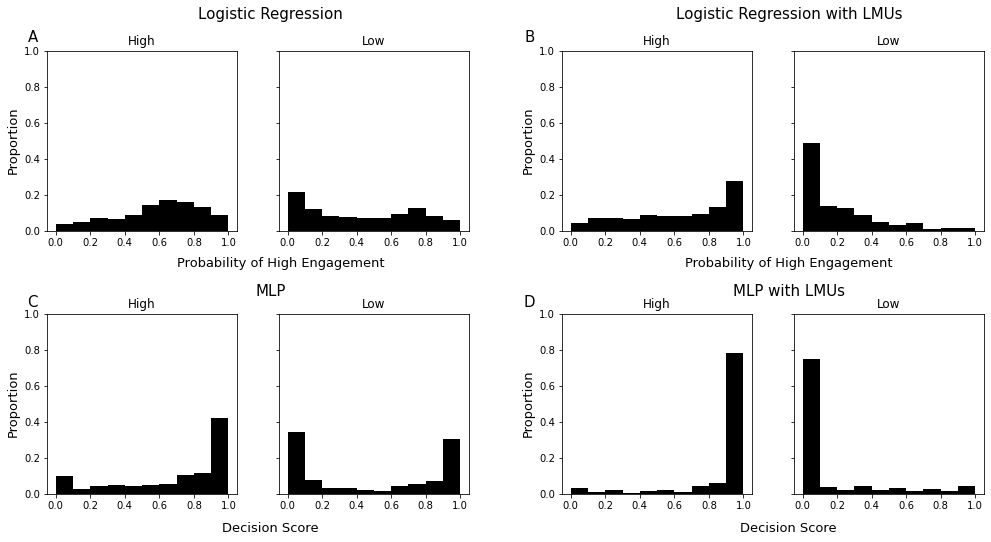

In [19]:
bins=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

#plot histograms - x-axis = classifier output, y-axis = count
fig = plt.figure(figsize=(15, 8))
outer = gridspec.GridSpec(2, 2)
lrrplot = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=outer[0])
lrlplot = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=outer[1])
mlprplot = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=outer[2])
mlplplot = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=outer[3])

fig.text(0.29, 0.94, 'Logistic Regression', ha='center', fontsize=15)
ax1 = fig.add_subplot(lrrplot[0, 0])
ax1.hist(high_lrraw_summary[:,0], bins=bins, color='black', 
         weights=np.ones(len(high_lrraw_summary[:,0])) / len(high_lrraw_summary[:,0]))
ax1.title.set_text('High')
ax1.set_ylabel('Proportion', fontsize=13)
ax1.set_ylim([0, 1.0])
ax2 = fig.add_subplot(lrrplot[0, 1], sharey=ax1)
ax2.hist(low_lrraw_summary[:,0], bins=bins, color='black', 
         weights=np.ones(len(low_lrraw_summary[:,0])) / len(low_lrraw_summary[:,0]))
ax2.title.set_text('Low')
plt.setp(ax2.get_yticklabels(), visible=False)

fig.text(0.3, 0.51, 'Probability of High Engagement', ha='center', fontsize=13)

fig.text(0.77, 0.94, 'Logistic Regression with LMUs', ha='center', fontsize=15)
ax3 = fig.add_subplot(lrlplot[0, 0])
ax3.hist(high_lrlmu_summary[:,0], bins=bins, color='black', 
         weights=np.ones(len(high_lrlmu_summary[:,0])) / len(high_lrlmu_summary[:,0]))
ax3.title.set_text('High')
ax3.set_ylabel('Proportion', fontsize=13)
ax3.set_ylim([0, 1.0])
ax4 = fig.add_subplot(lrlplot[0, 1], sharey=ax3)
ax4.hist(low_lrlmu_summary[:,0], bins=bins, color='black', 
         weights=np.ones(len(low_lrlmu_summary[:,0])) / len(low_lrlmu_summary[:,0]))
ax4.title.set_text('Low')
plt.setp(ax4.get_yticklabels(), visible=False)

fig.text(0.77, 0.51, 'Probability of High Engagement', ha='center', fontsize=13)

fig.text(0.29, 0.46, 'MLP', ha='center', fontsize=15)
ax5 = fig.add_subplot(mlprplot[0, 0])
ax5.hist(high_mlpraw_summary[:,0], bins=bins, color='black', 
         weights=np.ones(len(high_mlpraw_summary[:,0])) / len(high_mlpraw_summary[:,0]))
ax5.title.set_text('High')
ax5.set_ylabel('Proportion', fontsize=13)
ax5.set_ylim([0, 1.0])
ax6 = fig.add_subplot(mlprplot[0, 1], sharey=ax5)
ax6.hist(low_mlpraw_summary[:,0], bins=bins, color='black', 
         weights=np.ones(len(low_mlpraw_summary[:,0])) / len(low_mlpraw_summary[:,0]))
ax6.title.set_text('Low')
plt.setp(ax6.get_yticklabels(), visible=False)

fig.text(0.29, 0.05, 'Decision Score', ha='center', fontsize=13)

fig.text(0.77, 0.46, 'MLP with LMUs', ha='center', fontsize=15)
ax7 = fig.add_subplot(mlplplot[0, 0])
ax7.hist(high_mlplmu_summary[:,0], bins=bins, color='black', 
         weights=np.ones(len(high_mlplmu_summary[:,0])) / len(high_mlplmu_summary[:,0]))
ax7.title.set_text('High')
ax7.set_ylabel('Proportion', fontsize=13)
ax7.set_ylim([0, 1.0])
ax8 = fig.add_subplot(mlplplot[0, 1], sharey=ax7)
ax8.hist(low_mlplmu_summary[:,0], bins=bins, color='black', 
         weights=np.ones(len(low_mlplmu_summary[:,0])) / len(low_mlplmu_summary[:,0]))
ax8.title.set_text('Low')
plt.setp(ax8.get_yticklabels(), visible=False)

fig.text(0.77, 0.05, 'Decision Score', ha='center', fontsize=13)
fig.tight_layout(pad=5.0)

fig.text(0.07, 0.9, 'A', ha='center', fontsize=15)
fig.text(0.53, 0.9, 'B', ha='center', fontsize=15)
fig.text(0.07, 0.44, 'C', ha='center', fontsize=15)
fig.text(0.53, 0.44, 'D', ha='center', fontsize=15)

fig.savefig('../Figs/cliphist.png')

In [20]:
print(len(high_lrraw_summary[:,0]))
print(len(low_lrraw_summary[:,0]))

360
360


**Calculate mean percent of high and low frames classified correctly by each approach.**

Logistic Regression without LMUs

In [21]:
high_counts=[]
start=0
end=18
for j in range(20):
    (nh, bins, plot) = ax1.hist(np.vstack(high_lrraw_summary[start:end,0]), bins=bins)
    high_counts.append(nh)
    end+=18
    start+=18
        
mid_counts=[]
start=0
end=52
for j in range(20):
    (nm, bins, plot) = ax1.hist(np.vstack(mid_lrraw_summary[start:end,0]), bins=bins)
    mid_counts.append(nm)
    end+=52
    start+=52
    
low_counts=[]
start=0
end=18
for j in range(20):
    (nl, bins, plot) = ax1.hist(np.vstack(low_lrraw_summary[start:end,0]), bins=bins)
    low_counts.append(nl)
    end+=18
    start+=18

In [22]:
high_cor = [item[9] for item in high_counts] #no. high clips classified correctly in each experiment
high_len = [sum(item) for item in high_counts] #no. high clips total in each experiment (18)

mid_cor = [(item[1]+item[2]+item[3]+item[4]+item[5]+item[6]+item[7]+item[8]) for item in mid_counts] #no. mid clips classified correctly in each experiment
mid_len = [sum(item) for item in mid_counts] #no. mid clips total in each experiment (52)

low_cor = [item[0] for item in low_counts] #no. low clips classified correctly in each experiment
low_len = [sum(item) for item in low_counts] #no. low clips total in each experiment (18)

#Calculate percent correct in each experiment for each class (3 lists of 20 percentages)
high_percent=[]
mid_percent=[]
low_percent=[]
lrr_percentcorrect=[]
for i in range(20):
    high_percent.append((high_cor[i]/high_len[i])*100)
    mid_percent.append((mid_cor[i]/mid_len[i])*100)
    low_percent.append((low_cor[i]/low_len[i])*100)
    lrr_percentcorrect.append((high_cor[i]+low_cor[i])/(high_len[i]+low_len[i]))
    
high_percent=np.asarray(high_percent)
mid_percent=np.asarray(mid_percent)
low_percent=np.asarray(low_percent)

#Calculate mean percent correct and standard deviation for each clip type
lrrhigh_cor_mean=high_percent.mean()
lrrhigh_cor_sd=high_percent.std()
lrrmid_cor_mean=mid_percent.mean()
lrrmid_cor_sd=mid_percent.std()
lrrlow_cor_mean=low_percent.mean()
lrrlow_cor_sd=low_percent.std()

Logistic Regression with LMUs

In [23]:
high_counts=[]
start=0
end=18
for j in range(20):
    (nh, bins, plot) = ax1.hist(np.vstack(high_lrlmu_summary[start:end,0]), bins=bins)
    high_counts.append(nh)
    end+=18
    start+=18
        
mid_counts=[]
start=0
end=52
for j in range(20):
    (nm, bins, plot) = ax1.hist(np.vstack(mid_lrlmu_summary[start:end,0]), bins=bins)
    mid_counts.append(nm)
    end+=52
    start+=52
    
low_counts=[]
start=0
end=18
for j in range(20):
    (nl, bins, plot) = ax1.hist(np.vstack(low_lrlmu_summary[start:end,0]), bins=bins)
    low_counts.append(nl)
    end+=18
    start+=18

In [24]:
high_cor = [item[9] for item in high_counts] #no. high clips classified correctly in each experiment
high_len = [sum(item) for item in high_counts] #no. high clips total in each experiment (18)

mid_cor = [(item[1]+item[2]+item[3]+item[4]+item[5]+item[6]+item[7]+item[8]) for item in mid_counts] #no. mid clips classified correctly in each experiment
mid_len = [sum(item) for item in mid_counts] #no. mid clips total in each experiment (52)

low_cor = [item[0] for item in low_counts] #no. low clips classified correctly in each experiment
low_len = [sum(item) for item in low_counts] #no. low clips total in each experiment (18)

#Calculate percent correct in each experiment for each class (3 lists of 20 percentages)
high_percent=[]
mid_percent=[]
low_percent=[]
lrl_percentcorrect=[]
for i in range(20):
    high_percent.append((high_cor[i]/high_len[i])*100)
    mid_percent.append((mid_cor[i]/mid_len[i])*100)
    low_percent.append((low_cor[i]/low_len[i])*100)
    lrl_percentcorrect.append((high_cor[i]+low_cor[i])/(high_len[i]+low_len[i]))
    
high_percent=np.asarray(high_percent)
mid_percent=np.asarray(mid_percent)
low_percent=np.asarray(low_percent)

#Calculate mean percent correct and standard deviation for each clip type
lrlmuhigh_cor_mean=high_percent.mean()
lrlmuhigh_cor_sd=high_percent.std()
lrlmumid_cor_mean=mid_percent.mean()
lrlmumid_cor_sd=mid_percent.std()
lrlmulow_cor_mean=low_percent.mean()
lrlmulow_cor_sd=low_percent.std()

MLP without LMUs

In [25]:
high_counts=[]
start=0
end=18
for j in range(20):
    (nh, bins, plot) = ax1.hist(np.vstack(high_mlpraw_summary[start:end,0]), bins=bins)
    high_counts.append(nh)
    end+=18
    start+=18
        
mid_counts=[]
start=0
end=52
for j in range(20):
    (nm, bins, plot) = ax1.hist(np.vstack(mid_mlpraw_summary[start:end,0]), bins=bins)
    mid_counts.append(nm)
    end+=52
    start+=52
    
low_counts=[]
start=0
end=18
for j in range(20):
    (nl, bins, plot) = ax1.hist(np.vstack(low_mlpraw_summary[start:end,0]), bins=bins)
    low_counts.append(nl)
    end+=18
    start+=18

In [26]:
high_cor = [item[9] for item in high_counts] #no. high clips classified correctly in each experiment
high_len = [sum(item) for item in high_counts] #no. high clips total in each experiment (18)

mid_cor = [(item[1]+item[2]+item[3]+item[4]+item[5]+item[6]+item[7]+item[8]) for item in mid_counts] #no. mid clips classified correctly in each experiment
mid_len = [sum(item) for item in mid_counts] #no. mid clips total in each experiment (52)

low_cor = [item[0] for item in low_counts] #no. low clips classified correctly in each experiment
low_len = [sum(item) for item in low_counts] #no. low clips total in each experiment (18)

#Calculate percent correct in each experiment for each class (3 lists of 20 percentages)
high_percent=[]
mid_percent=[]
low_percent=[]
mlpr_percentcorrect=[]
for i in range(20):
    high_percent.append((high_cor[i]/high_len[i])*100)
    mid_percent.append((mid_cor[i]/mid_len[i])*100)
    low_percent.append((low_cor[i]/low_len[i])*100)
    mlpr_percentcorrect.append((high_cor[i]+low_cor[i])/(high_len[i]+low_len[i]))
    
high_percent=np.asarray(high_percent)
mid_percent=np.asarray(mid_percent)
low_percent=np.asarray(low_percent)

#Calculate mean percent correct and standard deviation for each clip type
mlprhigh_cor_mean=high_percent.mean()
mlprhigh_cor_sd=high_percent.std()
mlprmid_cor_mean=mid_percent.mean()
mlprmid_cor_sd=mid_percent.std()
mlprlow_cor_mean=low_percent.mean()
mlprlow_cor_sd=low_percent.std()

MLP with LMUs

In [27]:
high_counts=[]
start=0
end=18
for j in range(20):
    (nh, bins, plot) = ax1.hist(np.vstack(high_mlplmu_summary[start:end,0]), bins=bins)
    high_counts.append(nh)
    end+=18
    start+=18
        
mid_counts=[]
start=0
end=52
for j in range(20):
    (nm, bins, plot) = ax1.hist(np.vstack(mid_mlplmu_summary[start:end,0]), bins=bins)
    mid_counts.append(nm)
    end+=52
    start+=52
    
low_counts=[]
start=0
end=18
for j in range(20):
    (nl, bins, plot) = ax1.hist(np.vstack(low_mlplmu_summary[start:end,0]), bins=bins)
    low_counts.append(nl)
    end+=18
    start+=18

In [28]:
high_cor = [item[9] for item in high_counts] #no. high clips classified correctly in each experiment
high_len = [sum(item) for item in high_counts] #no. high clips total in each experiment (18)

mid_cor = [(item[1]+item[2]+item[3]+item[4]+item[5]+item[6]+item[7]+item[8]) for item in mid_counts] #no. mid clips classified correctly in each experiment
mid_len = [sum(item) for item in mid_counts] #no. mid clips total in each experiment (52)

low_cor = [item[0] for item in low_counts] #no. low clips classified correctly in each experiment
low_len = [sum(item) for item in low_counts] #no. low clips total in each experiment (18)

#Calculate percent correct in each experiment for each class (3 lists of 20 percentages)
high_percent=[]
mid_percent=[]
low_percent=[]
mlpl_percentcorrect=[]
for i in range(20):
    high_percent.append((high_cor[i]/high_len[i])*100)
    mid_percent.append((mid_cor[i]/mid_len[i])*100)
    low_percent.append((low_cor[i]/low_len[i])*100)
    mlpl_percentcorrect.append((high_cor[i]+low_cor[i])/(high_len[i]+low_len[i]))
    
high_percent=np.asarray(high_percent)
mid_percent=np.asarray(mid_percent)
low_percent=np.asarray(low_percent)

#Calculate mean percent correct and standard deviation for each clip type
mlplmuhigh_cor_mean=high_percent.mean()
mlplmuhigh_cor_sd=high_percent.std()
mlplmumid_cor_mean=mid_percent.mean()
mlplmumid_cor_sd=mid_percent.std()
mlplmulow_cor_mean=low_percent.mean()
mlplmulow_cor_sd=low_percent.std()

In [29]:
Percent_Correct_Clips = pd.DataFrame({'LR w/o LMU M(SD)': [f'{lrrhigh_cor_mean:.2f}'+'%'+' ('+f'{lrrhigh_cor_sd:.2f}'+')',
                                                  f'{lrrmid_cor_mean:.2f}'+'%'+' ('+f'{lrrmid_cor_sd:.2f}'+')',
                                                  f'{lrrlow_cor_mean:.2f}'+'%'+' ('+f'{lrrlow_cor_sd:.2f}'+')'],
                                'LR with LMU M(SD)': [f'{lrlmuhigh_cor_mean:.2f}'+'%'+' ('+f'{lrlmuhigh_cor_sd:.2f}'+')',
                                                  f'{lrlmumid_cor_mean:.2f}'+'%'+' ('+f'{lrlmumid_cor_sd:.2f}'+')',
                                                  f'{lrlmulow_cor_mean:.2f}'+'%'+' ('+f'{lrlmulow_cor_sd:.2f}'+')'],
                                'MLP w/o LMU M(SD)': [f'{mlprhigh_cor_mean:.2f}'+'%'+' ('+f'{mlprhigh_cor_sd:.2f}'+')',
                                                  f'{mlprmid_cor_mean:.2f}'+'%'+' ('+f'{mlprmid_cor_sd:.2f}'+')',
                                                  f'{mlprlow_cor_mean:.2f}'+'%'+' ('+f'{mlprlow_cor_sd:.2f}'+')'],
                                'MLP with LMU M(SD)': [f'{mlplmuhigh_cor_mean:.2f}'+'%'+' ('+f'{mlplmuhigh_cor_sd:.2f}'+')',
                                                  f'{mlplmumid_cor_mean:.2f}'+'%'+' ('+f'{mlplmumid_cor_sd:.2f}'+')',
                                                  f'{mlplmulow_cor_mean:.2f}'+'%'+' ('+f'{mlplmulow_cor_sd:.2f}'+')']})

Percent_Correct_Clips.set_index([pd.Index(['High Engagement', 'Intermediate Engagement', 'Low Engagement'])])

,LR w/o LMU M(SD),LR with LMU M(SD),MLP w/o LMU M(SD),MLP with LMU M(SD)
High Engagement,8.89% (7.93),27.78% (8.78),42.22% (16.70),78.06% (10.46)
Intermediate Engagement,87.50% (4.77),64.52% (5.03),43.85% (6.25),39.33% (3.87)
Low Engagement,21.67% (10.96),48.61% (9.92),34.17% (15.04),75.00% (10.17)


## Impact of classifier type and LMU pre-processing

2-way ANOVA with classifier (Logistic Regression vs. MLP) and Pre-processing (with vs. without LMU) <br>
Dependent Variable (outcome) = percent of high and low engagement clips classified correctly in each experiment. <br>
Independent Variables = classifier and pre-processing step

**Create dataframe**

In [30]:
lrr_percentcorrect=pd.DataFrame(lrr_percentcorrect)
lrr_percentcorrect['classifier']='classifier1'
lrr_percentcorrect['preprocess']='preprocess1'

lrl_percentcorrect=pd.DataFrame(lrl_percentcorrect)
lrl_percentcorrect['classifier']='classifier1'
lrl_percentcorrect['preprocess']='preprocess2'

mlpr_percentcorrect=pd.DataFrame(mlpr_percentcorrect)
mlpr_percentcorrect['classifier']='classifier2'
mlpr_percentcorrect['preprocess']='preprocess1'

mlpl_percentcorrect=pd.DataFrame(mlpl_percentcorrect)
mlpl_percentcorrect['classifier']='classifier2'
mlpl_percentcorrect['preprocess']='preprocess2'

In [31]:
stacked_data=lrr_percentcorrect.append(lrl_percentcorrect)
stacked_data=stacked_data.append(mlpr_percentcorrect)
stacked_data=stacked_data.append(mlpl_percentcorrect)

stacked_data = stacked_data.rename(columns={0:'result'})

Create ANOVA model

In [32]:
results = ols('result ~ classifier*preprocess', stacked_data).fit()

**Assumption Checks**

Shapiro's test for normality - testing the residuals. If not significant the residuals are normally distributed.

In [33]:
stats.shapiro(results.resid)

(0.9827147722244263, 0.35397347807884216)

Bartlett's test for equal variances between groups. If not significant the groups have equal variances.

In [34]:
stats.bartlett(stacked_data['result'][(stacked_data['classifier'] == 'classifier1') & (stacked_data['preprocess'] == 'preprocess1')],
             stacked_data['result'][(stacked_data['classifier'] == 'classifier1') & (stacked_data['preprocess'] == 'preprocess2')],
             stacked_data['result'][(stacked_data['classifier'] == 'classifier2') & (stacked_data['preprocess'] == 'preprocess1')],
             stacked_data['result'][(stacked_data['classifier'] == 'classifier2') & (stacked_data['preprocess'] == 'preprocess2')])

BartlettResult(statistic=0.9902999305690166, pvalue=0.8035990712359107)

**Two-way ANOVA**

In [35]:
rp.summary_cont(stacked_data.groupby(['classifier']))['result']

,N,Mean,SD,SE,95% Conf.,Interval
classifier,,,,,,
classifier1,40,0.2674,0.1344,0.0213,0.2244,0.3104
classifier2,40,0.5736,0.2057,0.0325,0.5078,0.6394


In [36]:
rp.summary_cont(stacked_data.groupby(['preprocess']))['result']

,N,Mean,SD,SE,95% Conf.,Interval
preprocess,,,,,,
preprocess1,40,0.2674,0.1347,0.0213,0.2243,0.3104
preprocess2,40,0.5736,0.2055,0.0325,0.5079,0.6393


In [37]:
rp.summary_cont(stacked_data.groupby(['classifier', 'preprocess']))['result']

N    Mean      SD      SE  95% Conf.  Interval
classifier  preprocess                                                  
classifier1 preprocess1  20  0.1528  0.0634  0.0142     0.1231    0.1825
            preprocess2  20  0.3819  0.0737  0.0165     0.3475    0.4164
classifier2 preprocess1  20  0.3819  0.0748  0.0167     0.3469    0.4169
            preprocess2  20  0.7653  0.0627  0.0140     0.7359    0.7946

In [38]:
aov_table = sm.stats.anova_lm(results, typ=2)

def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']
    
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
    
    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

anova_table(aov_table)

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
classifier,1.875781,1.0,1.875781,395.244304,7.669991e-32,0.443333,0.441716
preprocess,1.875781,1.0,1.875781,395.244304,7.669991e-32,0.443333,0.441716
classifier:preprocess,0.118837,1.0,0.118837,25.040004,3.529114e-06,0.028087,0.026935
Residual,0.360687,76.0,0.004746,NaN,NaN,NaN,NaN


In [ ]:
plt.plot(stacked_data['preprocess'], stacked_data['result'], "mo--", linewidth = 3,
        markersize = 10, label = "Pre-Process")
 
plt.plot(days, mumbai_tem, "yo:", linewidth = 3,
        markersize = 10, label = "Mumbai tem}")
 
plt.title("Delhi  &amp; Mumbai Temperature", fontsize=15)
plt.xlabel("days",fontsize=13)
plt.ylabel("temperature",fontsize=13)
plt.legend(loc = 4)
plt.show()

In [38]:
mc = statsmodels.stats.multicomp.MultiComparison(stacked_data['result'], stacked_data['classifier'])
mc_results = mc.tukeyhsd()
print(mc_results)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
   group1      group2   meandiff p-adj lower  upper  reject
-----------------------------------------------------------
classifier1 classifier2   0.3062 0.001 0.2289 0.3836   True
-----------------------------------------------------------


In [39]:
mc = statsmodels.stats.multicomp.MultiComparison(stacked_data['result'], stacked_data['preprocess'])
mc_results = mc.tukeyhsd()
print(mc_results)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
   group1      group2   meandiff p-adj lower  upper  reject
-----------------------------------------------------------
preprocess1 preprocess2   0.3062 0.001 0.2289 0.3836   True
-----------------------------------------------------------


In [84]:
from bioinfokit.analys import stat
res = stat()
res.tukey_hsd(df=stacked_data, res_var='result', xfac_var=['classifier','preprocess'], 
              anova_model='result ~ classifier:preprocess')
res.tukey_summary.head()

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,"(classifier1, preprocess1)","(classifier1, preprocess2)",2.291667e-01,0.171940,0.286393,1.487675e+01,0.001
1,"(classifier1, preprocess1)","(classifier2, preprocess1)",2.291667e-01,0.171940,0.286393,1.487675e+01,0.001
2,"(classifier1, preprocess1)","(classifier2, preprocess2)",6.125000e-01,0.555273,0.669727,3.976150e+01,0.001
3,"(classifier1, preprocess2)","(classifier2, preprocess1)",5.551115e-17,-0.057227,0.057227,3.603603e-15,0.900
4,"(classifier1, preprocess2)","(classifier2, preprocess2)",3.833333e-01,0.326107,0.440560,2.488475e+01,0.001


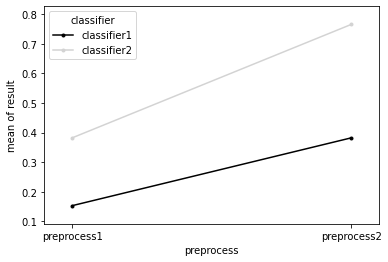

In [65]:
fig = interaction_plot(x=stacked_data['preprocess'], trace=stacked_data['classifier'], 
                       response=stacked_data['result'], colors=['black','lightgrey'])
ax = fig.axes[0]
ax.xlabel=("Pre-process")

# Performance on Untrained Classes

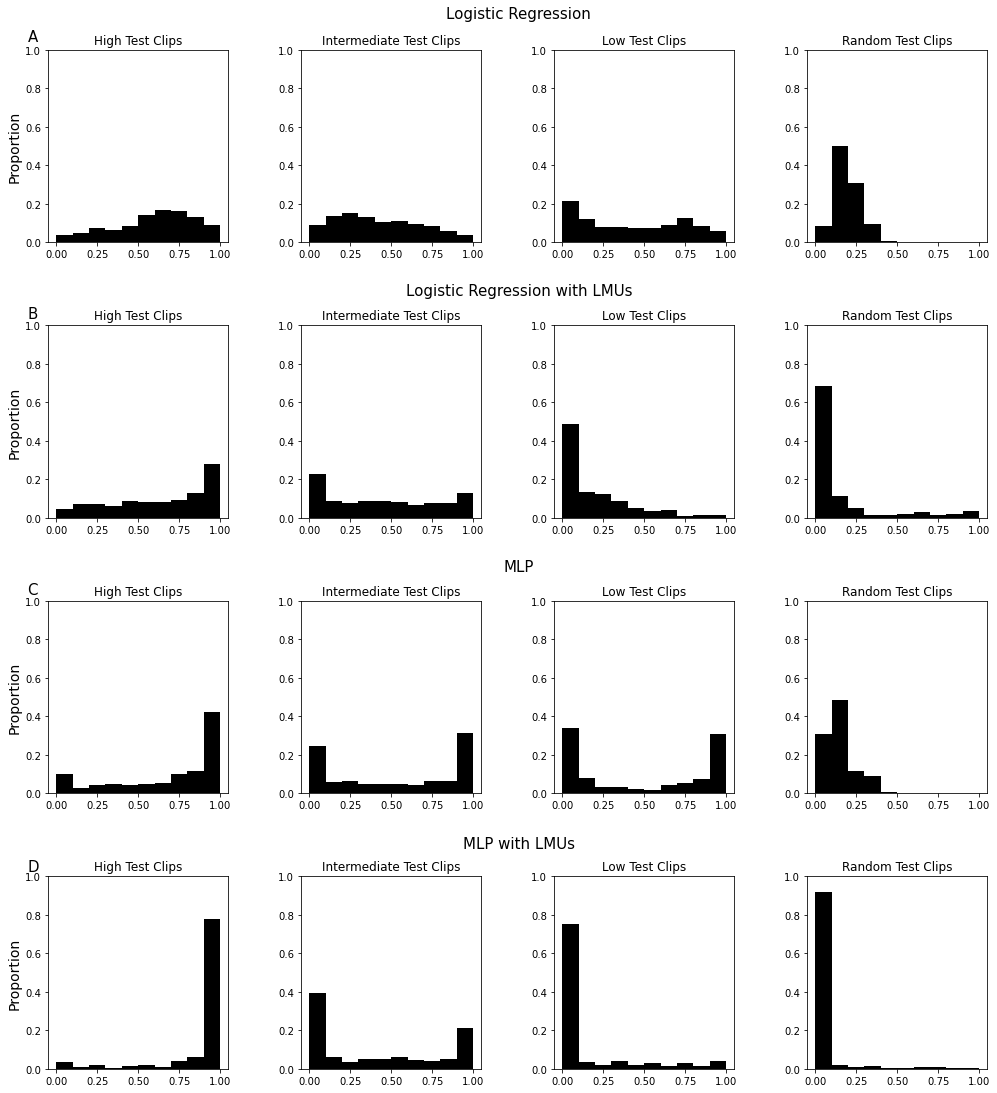

In [40]:
#Plot the mean output of each test clip in all 20 experiments
bins=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

#plot histograms - x-axis = classifier output, y-axis = count
fig = plt.figure(figsize=(15, 16))
outer = gridspec.GridSpec(4, 4)

fig.text(0.52, 0.97, 'Logistic Regression', ha='center', fontsize=15)
ax1 = fig.add_subplot(outer[0])
ax1.hist(high_lrraw_summary[:,0], bins=bins, color='black', 
         weights=np.ones(len(high_lrraw_summary[:,0])) / len(high_lrraw_summary[:,0]))
ax1.title.set_text('High Test Clips')
ax1.set_ylabel('Proportion', fontsize=14)
ax1.set_ylim([0, 1.0])
ax2 = fig.add_subplot(outer[1], sharey=ax1)
ax2.hist(mid_lrraw_summary[:,0], bins=bins, color='black', 
         weights=np.ones(len(mid_lrraw_summary[:,0])) / len(mid_lrraw_summary[:,0]))
ax2.title.set_text('Intermediate Test Clips')
ax3 = fig.add_subplot(outer[2], sharey=ax1)
ax3.hist(low_lrraw_summary[:,0], bins=bins, color='black', 
         weights=np.ones(len(low_lrraw_summary[:,0])) / len(low_lrraw_summary[:,0]))
ax3.title.set_text('Low Test Clips')
ax4 = fig.add_subplot(outer[3], sharey=ax1)
ax4.hist(random_lrraw_summary[:,0], bins=bins, color='black', 
         weights=np.ones(len(random_lrraw_summary[:,0])) / len(random_lrraw_summary[:,0]))
ax4.title.set_text('Random Test Clips')

fig.text(0.52, 0.73, 'Logistic Regression with LMUs', ha='center', fontsize=15)
ax5 = fig.add_subplot(outer[4])
ax5.hist(high_lrlmu_summary[:,0], bins=bins, color='black', 
         weights=np.ones(len(high_lrlmu_summary[:,0])) / len(high_lrlmu_summary[:,0]))
ax5.title.set_text('High Test Clips')
ax5.set_ylabel('Proportion', fontsize=14)
ax5.set_ylim([0, 1.0])
ax6 = fig.add_subplot(outer[5], sharey=ax5)
ax6.hist(mid_lrlmu_summary[:,0], bins=bins, color='black', 
         weights=np.ones(len(mid_lrlmu_summary[:,0])) / len(mid_lrlmu_summary[:,0]))
ax6.title.set_text('Intermediate Test Clips')
ax7 = fig.add_subplot(outer[6], sharey=ax5)
ax7.hist(low_lrlmu_summary[:,0], bins=bins, color='black', 
         weights=np.ones(len(low_lrlmu_summary[:,0])) / len(low_lrlmu_summary[:,0]))
ax7.title.set_text('Low Test Clips')
ax8 = fig.add_subplot(outer[7], sharey=ax5)
ax8.hist(random_lrlmu_summary[:,0], bins=bins, color='black', 
         weights=np.ones(len(random_lrlmu_summary[:,0])) / len(random_lrlmu_summary[:,0]))
ax8.title.set_text('Random Test Clips')

fig.text(0.52, 0.49, 'MLP', ha='center', fontsize=15)
ax9 = fig.add_subplot(outer[8])
ax9.hist(high_mlpraw_summary[:,0], bins=bins, color='black', 
         weights=np.ones(len(high_mlpraw_summary[:,0])) / len(high_mlpraw_summary[:,0]))
ax9.title.set_text('High Test Clips')
ax9.set_ylabel('Proportion', fontsize=14)
ax9.set_ylim([0, 1.0])
ax10 = fig.add_subplot(outer[9], sharey=ax9)
ax10.hist(mid_mlpraw_summary[:,0], bins=bins, color='black', 
         weights=np.ones(len(mid_mlpraw_summary[:,0])) / len(mid_mlpraw_summary[:,0]))
ax10.title.set_text('Intermediate Test Clips')
ax11 = fig.add_subplot(outer[10], sharey=ax9)
ax11.hist(low_mlpraw_summary[:,0], bins=bins, color='black', 
         weights=np.ones(len(low_mlpraw_summary[:,0])) / len(low_mlpraw_summary[:,0]))
ax11.title.set_text('Low Test Clips')
ax12 = fig.add_subplot(outer[11], sharey=ax1)
ax12.hist(random_mlpraw_summary[:,0], bins=bins, color='black', 
         weights=np.ones(len(random_mlpraw_summary[:,0])) / len(random_mlpraw_summary[:,0]))
ax12.title.set_text('Random Test Clips')

fig.text(0.52, 0.25, 'MLP with LMUs', ha='center', fontsize=15)
ax13 = fig.add_subplot(outer[12])
ax13.hist(high_mlplmu_summary[:,0], bins=bins, color='black', 
         weights=np.ones(len(high_mlplmu_summary[:,0])) / len(high_mlplmu_summary[:,0]))
ax13.title.set_text('High Test Clips')
ax13.set_ylabel('Proportion', fontsize=14)
ax13.set_ylim([0, 1.0])
ax14 = fig.add_subplot(outer[13], sharey=ax13)
ax14.hist(mid_mlplmu_summary[:,0], bins=bins, color='black', 
         weights=np.ones(len(mid_mlplmu_summary[:,0])) / len(mid_mlplmu_summary[:,0]))
ax14.title.set_text('Intermediate Test Clips')
ax15 = fig.add_subplot(outer[14], sharey=ax13)
ax15.hist(low_mlplmu_summary[:,0], bins=bins, color='black', 
         weights=np.ones(len(low_mlplmu_summary[:,0])) / len(low_mlplmu_summary[:,0]))
ax15.title.set_text('Low Test Clips')
ax16 = fig.add_subplot(outer[15], sharey=ax13)
ax16.hist(random_mlplmu_summary[:,0], bins=bins, color='black', 
         weights=np.ones(len(random_mlplmu_summary[:,0])) / len(random_mlplmu_summary[:,0]))
ax16.title.set_text('Random Test Clips')

fig.text(0.07, 0.95, 'A', ha='center', fontsize=15)
fig.text(0.07, 0.71, 'B', ha='center', fontsize=15)
fig.text(0.07, 0.47, 'C', ha='center', fontsize=15)
fig.text(0.07, 0.23, 'D', ha='center', fontsize=15)

fig.tight_layout(pad=5.0)
fig.savefig('../Figs/allcliphist.png')

In [47]:
from bioinfokit.analys import stat
res=stat()
res.tukey_hsd(stacked_data, res_var='result', xfac_var=['preprocess','classifier'], anova_model='result ~ C(preprocess) + C(classifier) + C(preprocess):C(classifier)')
res.tukey_summary.head()

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,"(preprocess1, classifier1)","(preprocess1, classifier2)",2.291667e-01,0.171940,0.286393,1.487675e+01,0.001
1,"(preprocess1, classifier1)","(preprocess2, classifier1)",2.291667e-01,0.171940,0.286393,1.487675e+01,0.001
2,"(preprocess1, classifier1)","(preprocess2, classifier2)",6.125000e-01,0.555273,0.669727,3.976150e+01,0.001
3,"(preprocess1, classifier2)","(preprocess2, classifier1)",5.551115e-17,-0.057227,0.057227,3.603603e-15,0.900
4,"(preprocess1, classifier2)","(preprocess2, classifier2)",3.833333e-01,0.326107,0.440560,2.488475e+01,0.001


In [41]:
print(len(high_lrraw_summary[:,0]))
print(len(mid_lrraw_summary[:,0]))
print(len(low_lrraw_summary[:,0]))
print(len(random_lrraw_summary[:,0]))

360
1040
360
360


**Classifier Output Across Clip Timeline** <br>
Plotting the outputs of the classifier for every frame of the first 18 clips of each class, across the timeline of that clip, for the first experiment of each approach. 

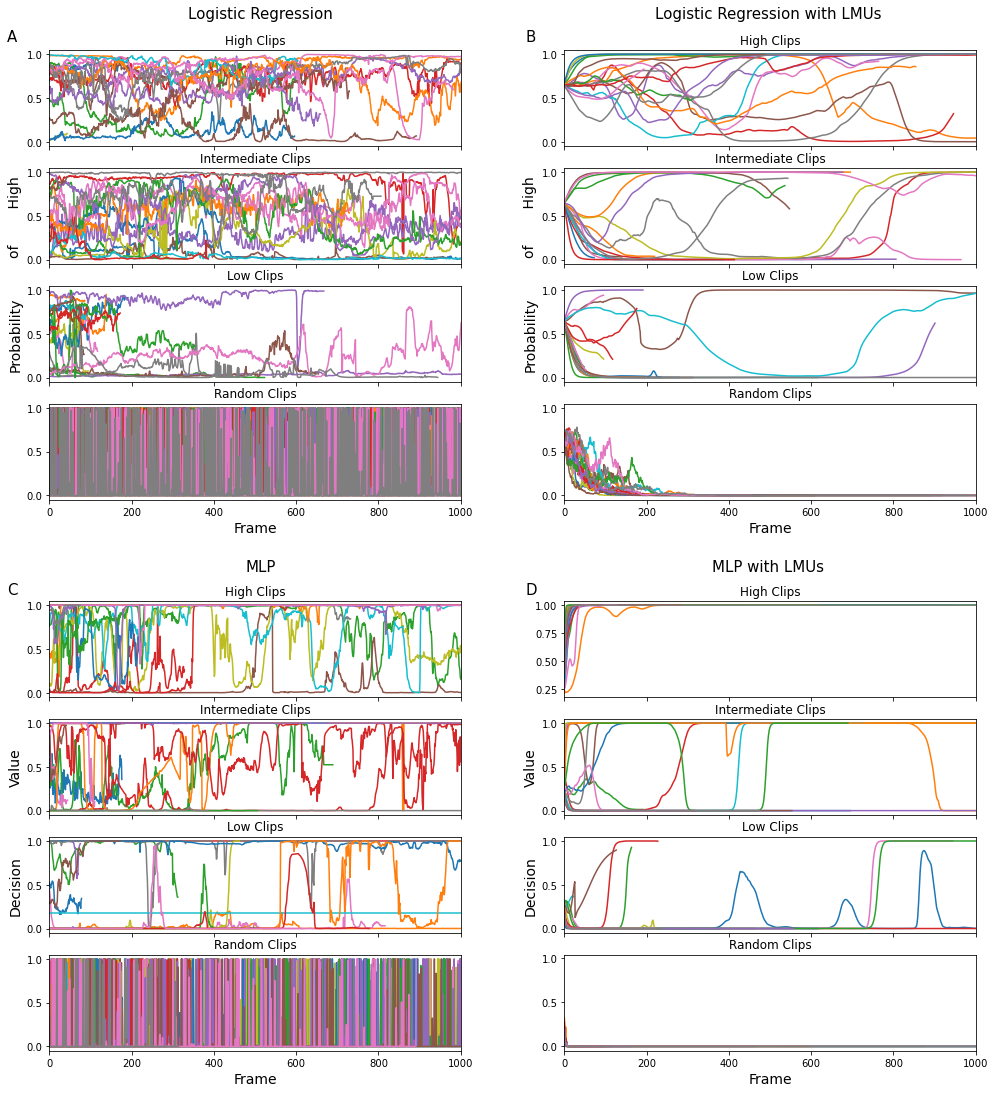

In [42]:
fig = plt.figure(figsize=(15, 16))
outer = gridspec.GridSpec(2, 2)
lrrplot = gridspec.GridSpecFromSubplotSpec(4, 1, subplot_spec=outer[0])
lrlplot = gridspec.GridSpecFromSubplotSpec(4, 1, subplot_spec=outer[1])
mlprplot = gridspec.GridSpecFromSubplotSpec(4, 1, subplot_spec=outer[2])
mlplplot = gridspec.GridSpecFromSubplotSpec(4, 1, subplot_spec=outer[3])

for i in range(18): # for each clip plot 1 line
#LOGISTIC REGRESSION WITHOUT LMUS
    ax1 = fig.add_subplot(lrrplot[0, 0])
    a=lrraw.iloc[0]['prediction_prob_high'][i]
    ax1.plot(a[:,1])
    ax1.set_xlim(0,1000)
    ax1.title.set_text('High Clips')
    plt.setp(ax1.get_xticklabels(), visible=False)

    ax2 = fig.add_subplot(lrrplot[1, 0])
    b=lrraw.iloc[0]['prediction_prob_mid'][i]
    ax2.plot(b[:,1])
    ax2.set_xlim(0,1000)
    ax2.set_ylabel('of        High', fontsize=14)
    ax2.title.set_text('Intermediate Clips')
    plt.setp(ax2.get_xticklabels(), visible=False)

    ax3 = fig.add_subplot(lrrplot[2, 0])
    c=lrraw.iloc[0]['prediction_prob_low'][i]
    ax3.plot(c[:,1])
    ax3.set_xlim(0,1000)
    ax3.set_ylabel('Probability', fontsize=14)
    ax3.title.set_text('Low Clips')
    plt.setp(ax3.get_xticklabels(), visible=False)

    ax4 = fig.add_subplot(lrrplot[3, 0])
    d=lrraw.iloc[0]['prediction_prob_random'][i]
    ax4.plot(d[:,1])
    ax4.set_xlim(0,1000)
    ax4.set_xlabel('Frame', fontsize=14)
    ax4.title.set_text('Random Clips')
    
# LOGISTIC REGRESSION WITH LMUS
    ax5 = fig.add_subplot(lrlplot[0, 0])
    e=lrlmu.iloc[0]['prediction_prob_high'][i]
    ax5.plot(e[:,1])
    ax5.set_xlim(0,1000)
    ax5.title.set_text('High Clips')
    plt.setp(ax5.get_xticklabels(), visible=False)

    ax6 = fig.add_subplot(lrlplot[1, 0])
    f=lrlmu.iloc[0]['prediction_prob_mid'][i]
    ax6.plot(f[:,1])
    ax6.set_xlim(0,1000)
    ax6.set_ylabel('of        High', fontsize=14)
    ax6.title.set_text('Intermediate Clips')
    plt.setp(ax6.get_xticklabels(), visible=False)

    ax7 = fig.add_subplot(lrlplot[2, 0])
    g=lrlmu.iloc[0]['prediction_prob_low'][i]
    ax7.plot(g[:,1])
    ax7.set_xlim(0,1000)
    ax7.set_ylabel('Probability', fontsize=14)
    ax7.title.set_text('Low Clips')
    plt.setp(ax7.get_xticklabels(), visible=False)

    ax8 = fig.add_subplot(lrlplot[3, 0])
    h=lrlmu.iloc[0]['prediction_prob_random'][i]
    ax8.plot(h[:,1])
    ax8.set_xlim(0,1000)
    ax8.set_xlabel('Frame', fontsize=14)
    ax8.title.set_text('Random Clips')

# MLP WITHOUT LMUS
    ax9 = fig.add_subplot(mlprplot[0, 0])
    q=mlpraw.iloc[0]['decision_high'][i]
    ax9.plot(q[:,0])
    ax9.set_xlim(0,1000)
    ax9.title.set_text('High Clips')
    plt.setp(ax9.get_xticklabels(), visible=False)

    ax10 = fig.add_subplot(mlprplot[1, 0])
    j=mlpraw.iloc[0]['decision_mid'][i]
    ax10.plot(j[:,0])
    ax10.set_xlim(0,1000)
    ax10.set_ylabel('Value', fontsize=14)
    ax10.title.set_text('Intermediate Clips')
    plt.setp(ax10.get_xticklabels(), visible=False)

    ax11 = fig.add_subplot(mlprplot[2, 0])
    k=mlpraw.iloc[0]['decision_low'][i]
    ax11.plot(k[:,0])
    ax11.set_xlim(0,1000)
    ax11.set_ylabel('Decision', fontsize=14)
    ax11.title.set_text('Low Clips')
    plt.setp(ax11.get_xticklabels(), visible=False)

    ax12 = fig.add_subplot(mlprplot[3, 0])
    l=mlpraw.iloc[0]['decision_random'][i]
    ax12.plot(l[:,0])
    ax12.set_xlim(0,1000)
    ax12.set_xlabel('Frame', fontsize=14)
    ax12.title.set_text('Random Clips')
    
# MLP WITH LMUS
    ax13 = fig.add_subplot(mlplplot[0, 0])
    m=mlplmu.iloc[0]['decision_high'][i]
    ax13.plot(m[:,0])
    ax13.set_xlim(0,1000)
    ax13.title.set_text('High Clips')
    plt.setp(ax13.get_xticklabels(), visible=False)

    ax14 = fig.add_subplot(mlplplot[1, 0])
    n=mlplmu.iloc[0]['decision_mid'][i]
    ax14.plot(n[:,0])
    ax14.set_xlim(0,1000)
    ax14.set_ylabel('Value', fontsize=14)
    ax14.title.set_text('Intermediate Clips')
    plt.setp(ax14.get_xticklabels(), visible=False)

    ax15 = fig.add_subplot(mlplplot[2, 0])
    o=mlplmu.iloc[0]['decision_low'][i]
    ax15.plot(o[:,0])
    ax15.set_xlim(0,1000)
    ax15.set_ylabel('Decision', fontsize=14)
    ax15.title.set_text('Low Clips')
    plt.setp(ax15.get_xticklabels(), visible=False)

    ax16 = fig.add_subplot(mlplplot[3, 0])
    p=mlplmu.iloc[0]['decision_random'][i]
    ax16.plot(p[:,0])
    ax16.set_xlim(0,1000)
    ax16.set_xlabel('Frame', fontsize=14)
    ax16.title.set_text('Random Clips')
    
fig.text(0.28, 0.97, 'Logistic Regression', ha='center', fontsize=15)
fig.text(0.75, 0.97, 'Logistic Regression with LMUs', ha='center', fontsize=15)
fig.text(0.28, 0.49, 'MLP', ha='center', fontsize=15)
fig.text(0.75, 0.49, 'MLP with LMUs', ha='center', fontsize=15)

fig.text(0.05, 0.95, 'A', ha='center', fontsize=15)
fig.text(0.53, 0.95, 'B', ha='center', fontsize=15)
fig.text(0.05, 0.47, 'C', ha='center', fontsize=15)
fig.text(0.53, 0.47, 'D', ha='center', fontsize=15)

fig.tight_layout(pad=5.0)
fig.savefig('../Figs/timelines.png')

# Separating the Classes

## Random vs. Non-Random <br>

Do the random clips occupy a different region of the four-dimensional descriptive statistic space to the engagement clips?

**Logistic Regression without LMUs** <br>
First we take 18 samples from each class in each of the 20 experiments.

In [43]:
lst=[]
start=0
end=106
for i in range(20):
    exp=summaries_lrraw[start:end]
    #get random sample of 18 high, intermediate and low clips from each experiment
    sample = random.sample(list(exp[:88]),18)
    sample = np.append(sample, exp[88:106],0)  
    sample[np.where(sample =='high')]='nonrandom'
    sample[np.where(sample =='mid')]='nonrandom'
    sample[np.where(sample =='low')]='nonrandom'
    lst.append(sample)
    start+=106
    end+=106

lrraw_r_nr=np.asarray(lst)

Now run kNN (k=5) to see how well these classes cluster based on clip mean, standard deviation, skew and kurtosis

In [44]:
lrr_scores=[]
lrr_confusion=np.zeros((20,2,2))

for i in range(20):
    X = lrraw_r_nr[i][:,:4]
    X = X.astype(np.float)
    y = lrraw_r_nr[i][:,4]
    
    #clf = LogisticRegression(solver='lbfgs', multi_class='multinomial').fit(X, y)
    clf = KNeighborsClassifier(n_neighbors=5).fit(X, y)
    lrr_scores.append(clf.score(X, y))
    y_pred=clf.predict(X)
    lrr_confusion[i]=confusion_matrix(y, y_pred, labels=['random', 'nonrandom'])
    
print('Logistic Regression using mean, sd, skew and kurtosis as predictors.')
print('Mean Score:           ', np.asarray(lrr_scores).mean())
print('Standard Deviation:   ', np.asarray(lrr_scores).std())

Logistic Regression using mean, sd, skew and kurtosis as predictors.
Mean Score:            0.9444444444444443
Standard Deviation:    0.03726779962499649


**Logistic Regression with LMUs** <br>
First we take 18 samples from each class in each of the 20 experiments.

In [45]:
lst=[]
start=0
end=106
for i in range(20):
    exp=summaries_lrlmu[start:end]
    #get random sample of 18 high, intermediate and low clips from each experiment
    sample = random.sample(list(exp[:88]),18)
    sample = np.append(sample, exp[88:106],0)  
    sample[np.where(sample =='high')]='nonrandom'
    sample[np.where(sample =='mid')]='nonrandom'
    sample[np.where(sample =='low')]='nonrandom'
    lst.append(sample)
    start+=106
    end+=106

lrlmu_r_nr=np.asarray(lst)

Now run kNN (k=5) to see how well these classes cluster based on clip mean, standard deviation, skew and kurtosis

In [46]:
lrl_scores=[]
lrl_confusion=np.zeros((20,2,2))

for i in range(20):
    X = lrlmu_r_nr[i][:,:4]
    X = X.astype(np.float)
    y = lrlmu_r_nr[i][:,4]
    
    #clf = LogisticRegression(solver='lbfgs', multi_class='multinomial').fit(X, y)
    clf = KNeighborsClassifier(n_neighbors=5).fit(X, y)
    lrl_scores.append(clf.score(X, y))
    y_pred=clf.predict(X)
    lrl_confusion[i]=confusion_matrix(y, y_pred, labels=['random', 'nonrandom'])
    
print('Logistic Regression using mean, sd, skew and kurtosis as predictors.')
print('Mean Score:           ', np.asarray(lrl_scores).mean())
print('Standard Deviation:   ', np.asarray(lrl_scores).std())

Logistic Regression using mean, sd, skew and kurtosis as predictors.
Mean Score:            0.7861111111111112
Standard Deviation:    0.09423997474270764


**MLP without LMUs** <br>
First we take 18 samples from each class in each of the 20 experiments.

In [47]:
lst=[]
start=0
end=106
for i in range(20):
    exp=summaries_mlpraw[start:end]
    #get random sample of 18 high, intermediate and low clips from each experiment
    sample = random.sample(list(exp[:88]),18)
    sample = np.append(sample, exp[88:106],0)  
    sample[np.where(sample =='high')]='nonrandom'
    sample[np.where(sample =='mid')]='nonrandom'
    sample[np.where(sample =='low')]='nonrandom'
    lst.append(sample)
    start+=106
    end+=106

mlpraw_r_nr=np.asarray(lst)

Now run kNN (k=5) to see how well these classes cluster based on clip mean, standard deviation, skew and kurtosis

In [48]:
mlpr_scores=[]
mlpr_confusion=np.zeros((20,2,2))

for i in range(20):
    X = mlpraw_r_nr[i][:,:4]
    X = X.astype(np.float)
    y = mlpraw_r_nr[i][:,4]
    
    #clf = LogisticRegression(solver='lbfgs', multi_class='multinomial').fit(X, y)
    clf = KNeighborsClassifier(n_neighbors=5).fit(X, y)
    mlpr_scores.append(clf.score(X, y))
    y_pred=clf.predict(X)
    mlpr_confusion[i]=confusion_matrix(y, y_pred, labels=['random', 'nonrandom'])
    
print('Logistic Regression using mean, sd, skew and kurtosis as predictors.')
print('Mean Score:           ', np.asarray(mlpr_scores).mean())
print('Standard Deviation:   ', np.asarray(mlpr_scores).std())

Logistic Regression using mean, sd, skew and kurtosis as predictors.
Mean Score:            0.9222222222222223
Standard Deviation:    0.03239417719358501


**MLP with LMUs** <br>
First we take 18 samples from each class in each of the 20 experiments.

In [49]:
lst=[]
start=0
end=106
for i in range(20):
    exp=summaries_mlplmu[start:end]
    #get random sample of 18 high, intermediate and low clips from each experiment
    sample = random.sample(list(exp[:88]),18)
    sample = np.append(sample, exp[88:106],0)  
    sample[np.where(sample =='high')]='nonrandom'
    sample[np.where(sample =='mid')]='nonrandom'
    sample[np.where(sample =='low')]='nonrandom'
    lst.append(sample)
    start+=106
    end+=106

mlplmu_r_nr=np.asarray(lst)

Now run kNN (k=5) to see how well these classes cluster based on clip mean, standard deviation, skew and kurtosis

In [50]:
mlpl_scores=[]
mlpl_confusion=np.zeros((20,2,2))

for i in range(20):
    X = mlplmu_r_nr[i][:,:4]
    X = X.astype(np.float)
    y = mlplmu_r_nr[i][:,4]
    
    #clf = LogisticRegression(solver='lbfgs', multi_class='multinomial').fit(X, y)
    clf = KNeighborsClassifier(n_neighbors=5).fit(X, y)
    mlpl_scores.append(clf.score(X, y))
    y_pred=clf.predict(X)
    mlpl_confusion[i]=confusion_matrix(y, y_pred, labels=['random', 'nonrandom'])
    
print('Logistic Regression using mean, sd, skew and kurtosis as predictors.')
print('Mean Score:           ', np.asarray(mlpl_scores).mean())
print('Standard Deviation:   ', np.asarray(mlpl_scores).std())

Logistic Regression using mean, sd, skew and kurtosis as predictors.
Mean Score:            0.7652777777777778
Standard Deviation:    0.0585808241915643


Confusion Matrix

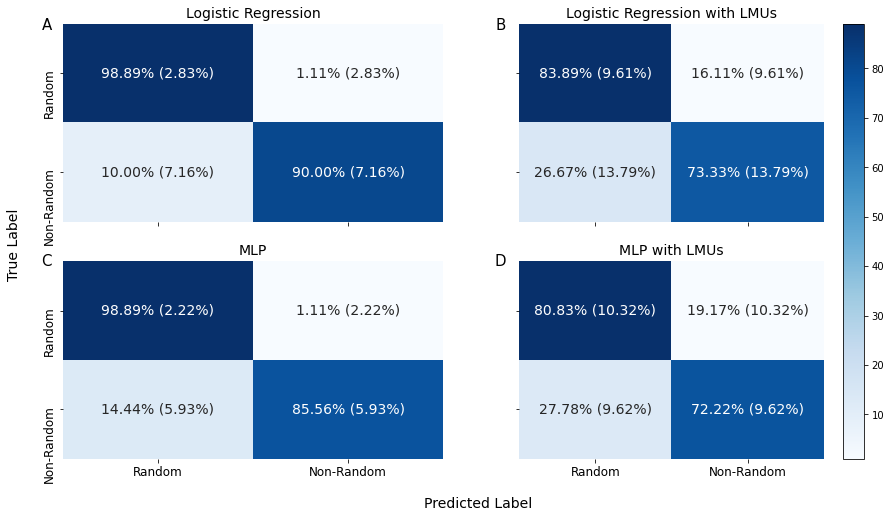

In [51]:
#Plot average confusion matrix
ticklabels=['Random', 'Non-Random']

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(15, 8))

labels1=np.array([[f'{lrr_confusion.mean(0)[0][0]/18*100:.2f}'+'%'+' ('+f'{lrr_confusion.std(0)[0][0]/18*100:.2f}'+'%)',
                  f'{lrr_confusion.mean(0)[0][1]/18*100:.2f}'+'%'+' ('+f'{lrr_confusion.std(0)[0][1]/18*100:.2f}'+'%)',],
                 [f'{lrr_confusion.mean(0)[1][0]/18*100:.2f}'+'%'+' ('+f'{lrr_confusion.std(0)[1][0]/18*100:.2f}'+'%)',
                  f'{lrr_confusion.mean(0)[1][1]/18*100:.2f}'+'%'+' ('+f'{lrr_confusion.std(0)[1][1]/18*100:.2f}'+'%)',]])
im = sns.heatmap(lrr_confusion.mean(0)/20*100, annot=labels1, annot_kws={"size": 14}, fmt='', cmap='Blues', xticklabels=ticklabels, yticklabels=ticklabels, cbar=False, ax=ax1)
ax1.set_title('Logistic Regression', fontsize=14)
im.set_yticklabels(labels=ticklabels, size = 12)

labels2=np.array([[f'{lrl_confusion.mean(0)[0][0]/18*100:.2f}'+'%'+' ('+f'{lrl_confusion.std(0)[0][0]/18*100:.2f}'+'%)',
                  f'{lrl_confusion.mean(0)[0][1]/18*100:.2f}'+'%'+' ('+f'{lrl_confusion.std(0)[0][1]/18*100:.2f}'+'%)',],
                 [f'{lrl_confusion.mean(0)[1][0]/18*100:.2f}'+'%'+' ('+f'{lrl_confusion.std(0)[1][0]/18*100:.2f}'+'%)',
                  f'{lrl_confusion.mean(0)[1][1]/18*100:.2f}'+'%'+' ('+f'{lrl_confusion.std(0)[1][1]/18*100:.2f}'+'%)',]])
b = sns.heatmap(lrl_confusion.mean(0)/20*100, annot=labels2, annot_kws={"size": 14}, fmt='', cmap='Blues', xticklabels=ticklabels, yticklabels=ticklabels, cbar=False, ax=ax2)
ax2.set_title('Logistic Regression with LMUs', fontsize=14)

labels3=np.array([[f'{mlpr_confusion.mean(0)[0][0]/18*100:.2f}'+'%'+' ('+f'{mlpr_confusion.std(0)[0][0]/18*100:.2f}'+'%)',
                  f'{mlpr_confusion.mean(0)[0][1]/18*100:.2f}'+'%'+' ('+f'{mlpr_confusion.std(0)[0][1]/18*100:.2f}'+'%)',],
                 [f'{mlpr_confusion.mean(0)[1][0]/18*100:.2f}'+'%'+' ('+f'{mlpr_confusion.std(0)[1][0]/18*100:.2f}'+'%)',
                  f'{mlpr_confusion.mean(0)[1][1]/18*100:.2f}'+'%'+' ('+f'{mlpr_confusion.std(0)[1][1]/18*100:.2f}'+'%)',]])
c=sns.heatmap(mlpr_confusion.mean(0)/20*100, annot=labels3, annot_kws={"size": 14}, fmt='', cmap='Blues', xticklabels=ticklabels, yticklabels=ticklabels, cbar=False, ax=ax3)
ax3.set_title('MLP', fontsize=14)
c.set_yticklabels(labels=ticklabels, size = 12)
c.set_xticklabels(labels=ticklabels, size = 12)

labels4=np.array([[f'{mlpl_confusion.mean(0)[0][0]/18*100:.2f}'+'%'+' ('+f'{mlpl_confusion.std(0)[0][0]/18*100:.2f}'+'%)',
                  f'{mlpl_confusion.mean(0)[0][1]/18*100:.2f}'+'%'+' ('+f'{mlpl_confusion.std(0)[0][1]/18*100:.2f}'+'%)',],
                 [f'{mlpl_confusion.mean(0)[1][0]/18*100:.2f}'+'%'+' ('+f'{mlpl_confusion.std(0)[1][0]/18*100:.2f}'+'%)',
                  f'{mlpl_confusion.mean(0)[1][1]/18*100:.2f}'+'%'+' ('+f'{mlpl_confusion.std(0)[1][1]/18*100:.2f}'+'%)',]])
d = sns.heatmap(mlpl_confusion.mean(0)/20*100, annot=labels4, annot_kws={"size": 14}, fmt='', cmap='Blues', xticklabels=ticklabels, yticklabels=ticklabels, cbar=False, ax=ax4)
ax4.set_title('MLP with LMUs', fontsize=14)
d.set_xticklabels(labels=ticklabels, size = 12)

#fig.suptitle('Mean (SD) Confusion Matrices', fontsize=16)
fig.text(0.51, 0.04, 'Predicted Label', ha='center', fontsize=14)
fig.text(0.08, 0.44, 'True Label', ha='center', rotation='vertical', fontsize=14)

fig.text(0.11, 0.87, 'A', ha='center', fontsize=15)
fig.text(0.53, 0.87, 'B', ha='center', fontsize=15)
fig.text(0.11, 0.46, 'C', ha='center', fontsize=15)
fig.text(0.53, 0.46, 'D', ha='center', fontsize=15)

mappable = im.get_children()[0]
fig.colorbar(mappable, ax = [ax2,ax4],orientation = 'vertical')
fig.savefig('../Figs/random_confusion.png')

## High vs. Intermediate vs. Low <br>

Does each engagement class occupy a different region of the four-dimensional descriptive statistic space?

**Logistic Regression without LMUs** <br>
First we take 18 samples from each class in each of the 20 experiments.

In [52]:
lst=[]
start=0
end=106
for i in range(20):
    exp=summaries_lrraw[start:end]
    sample = exp[:18]
    #get random sample of 18 intermediate clips from first experiment
    sample = np.append(sample, random.sample(list(exp[exp[:,4]=='mid']),18),0) 
    sample = np.append(sample, exp[70:88],0) 
    lst.append(sample)
    start+=106
    end+=106
lrraw_in=np.asarray(lst)

Now run kNN (k=5) to see how well these classes cluster based on clip mean, standard deviation, skew and kurtosis

In [53]:
lrr_scores=[]
lrr_confusion=np.zeros((20,3,3))

for i in range(20):
    X = lrraw_in[i][:,:4]
    X = X.astype(np.float)
    y = lrraw_in[i][:,4]
    
    #clf = LogisticRegression(solver='lbfgs', multi_class='multinomial').fit(X, y)
    clf = KNeighborsClassifier(n_neighbors=5).fit(X, y)
    lrr_scores.append(clf.score(X, y))
    y_pred=clf.predict(X)
    lrr_confusion[i]=confusion_matrix(y, y_pred, labels=['high', 'mid', 'low'])
    
print('kNN using mean, sd, skew and kurtosis as predictors.')
print('Actual Mean Score:           ', np.asarray(lrr_scores).mean())
print('Actual Standard Deviation:   ', np.asarray(lrr_scores).std())

kNN using mean, sd, skew and kurtosis as predictors.
Actual Mean Score:            0.5712962962962963
Actual Standard Deviation:    0.06475526364779949


**Logistic Regression with LMUs** <br>
First we take 18 samples from each class in each of the 20 experiments.

In [54]:
lst=[]
start=0
end=106
for i in range(20):
    exp=summaries_lrlmu[start:end]
    sample = exp[:18]
    #get random sample of 18 intermediate clips from first experiment
    sample = np.append(sample, random.sample(list(exp[exp[:,4]=='mid']),18),0) 
    sample = np.append(sample, exp[70:88],0) 
    lst.append(sample)
    start+=106
    end+=106
lrlmu_in=np.asarray(lst)

Now run kNN (k=5) to see how well these classes cluster based on clip mean, standard deviation, skew and kurtosis

In [55]:
lrl_scores=[]
lrl_confusion=np.zeros((20,3,3))

for i in range(20):
    X = lrlmu_in[i][:,:4]
    X = X.astype(np.float)
    y = lrlmu_in[i][:,4]
    
    #clf = LogisticRegression(solver='lbfgs', multi_class='multinomial').fit(X, y)
    clf = KNeighborsClassifier(n_neighbors=5).fit(X, y)
    lrl_scores.append(clf.score(X, y))
    y_pred=clf.predict(X)
    lrl_confusion[i]=confusion_matrix(y, y_pred, labels=['high', 'mid', 'low'])
    
print('kNN using mean, sd, skew and kurtosis as predictors.')
print('Actual Mean Score:           ', np.asarray(lrl_scores).mean())
print('Actual Standard Deviation:   ', np.asarray(lrl_scores).std())

kNN using mean, sd, skew and kurtosis as predictors.
Actual Mean Score:            0.6018518518518519
Actual Standard Deviation:    0.05540101963574664


**MLP without LMUs** <br>
First we take 18 samples from each class in each of the 20 experiments.

In [56]:
lst=[]
start=0
end=106
for i in range(20):
    exp=summaries_mlpraw[start:end]
    sample = exp[:18]
    #get random sample of 18 intermediate clips from first experiment
    sample = np.append(sample, random.sample(list(exp[exp[:,4]=='mid']),18),0) 
    sample = np.append(sample, exp[70:88],0) 
    lst.append(sample)
    start+=106
    end+=106
mlpraw_in=np.asarray(lst)

Now run kNN (k=5) to see how well these classes cluster based on clip mean, standard deviation, skew and kurtosis

In [57]:
mlpr_scores=[]
mlpr_confusion=np.zeros((20,3,3))

for i in range(20):
    X = mlpraw_in[i][:,:4]
    X = X.astype(np.float)
    y = mlpraw_in[i][:,4]
    
    #clf = LogisticRegression(solver='lbfgs', multi_class='multinomial').fit(X, y)
    clf = KNeighborsClassifier(n_neighbors=5).fit(X, y)
    mlpr_scores.append(clf.score(X, y))
    y_pred=clf.predict(X)
    mlpr_confusion[i]=confusion_matrix(y, y_pred, labels=['high', 'mid', 'low'])
    
print('Logistic Regression using mean, sd, skewness and kurtosis as predictors.')
print('Actual Mean Score:           ', np.asarray(mlpr_scores).mean())
print('Actual Standard Deviation:   ', np.asarray(mlpr_scores).std())

Logistic Regression using mean, sd, skewness and kurtosis as predictors.
Actual Mean Score:            0.5472222222222222
Actual Standard Deviation:    0.076235817453647


**MLP with LMUs** <br>
First we take 18 samples from each class in each of the 20 experiments.

In [58]:
lst=[]
start=0
end=106
for i in range(20):
    exp=summaries_mlplmu[start:end]
    sample = exp[:18]
    #get random sample of 18 intermediate clips from first experiment
    sample = np.append(sample, random.sample(list(exp[exp[:,4]=='mid']),18),0) 
    sample = np.append(sample, exp[70:88],0) 
    lst.append(sample)
    start+=106
    end+=106
mlplmu_in=np.asarray(lst)

Now run kNN (k=5) to see how well these classes cluster based on clip mean, standard deviation, skew and kurtosis

In [59]:
mlpl_scores=[]
mlpl_confusion=np.zeros((20,3,3))

for i in range(20):
    X = mlplmu_in[i][:,:4]
    X = X.astype(np.float)
    y = mlplmu_in[i][:,4]
    
    #clf = LogisticRegression(solver='lbfgs', multi_class='multinomial').fit(X, y)
    clf = KNeighborsClassifier(n_neighbors=5).fit(X, y)
    mlpl_scores.append(clf.score(X, y))
    y_pred=clf.predict(X)
    mlpl_confusion[i]=confusion_matrix(y, y_pred, labels=['high', 'mid', 'low'])
    
print('kNN using mean, sd, skewness and kurtosis as predictors.')
print('Actual Mean Score:           ', np.asarray(mlpl_scores).mean())
print('Actual Standard Deviation:   ', np.asarray(mlpl_scores).std())

kNN using mean, sd, skewness and kurtosis as predictors.
Actual Mean Score:            0.6194444444444445
Actual Standard Deviation:    0.05508286562124387


Confusion Matrix

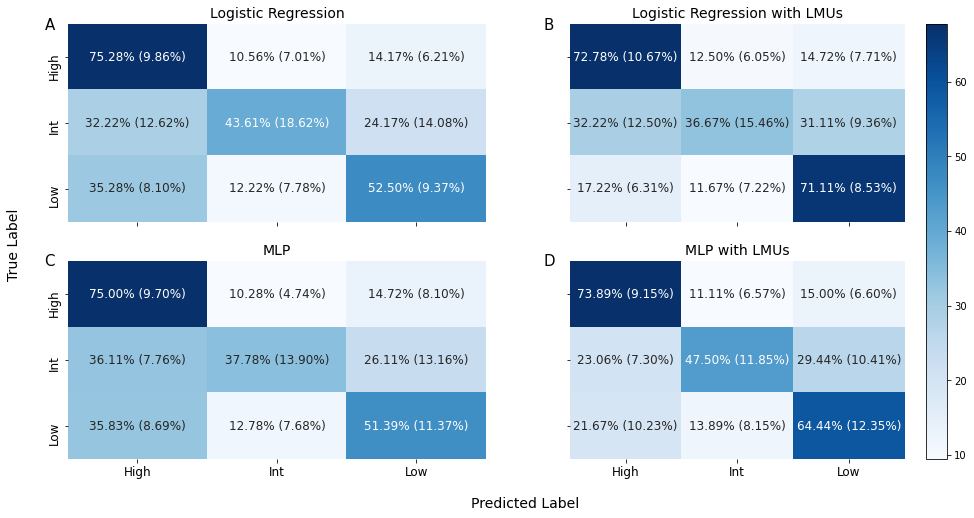

In [60]:
#Plot average confusion matrix
ticklabels=['High', 'Int', 'Low']

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(16.5, 8))

labels1=np.array([[f'{lrr_confusion.mean(0)[0][0]/18*100:.2f}'+'%'+' ('+f'{lrr_confusion.std(0)[0][0]/18*100:.2f}'+'%)',
                  f'{lrr_confusion.mean(0)[0][1]/18*100:.2f}'+'%'+' ('+f'{lrr_confusion.std(0)[0][1]/18*100:.2f}'+'%)',
                  f'{lrr_confusion.mean(0)[0][2]/18*100:.2f}'+'%'+' ('+f'{lrr_confusion.std(0)[0][2]/18*100:.2f}'+'%)',],
                 [f'{lrr_confusion.mean(0)[1][0]/18*100:.2f}'+'%'+' ('+f'{lrr_confusion.std(0)[1][0]/18*100:.2f}'+'%)',
                  f'{lrr_confusion.mean(0)[1][1]/18*100:.2f}'+'%'+' ('+f'{lrr_confusion.std(0)[1][1]/18*100:.2f}'+'%)',
                 f'{lrr_confusion.mean(0)[1][2]/18*100:.2f}'+'%'+' ('+f'{lrr_confusion.std(0)[1][2]/18*100:.2f}'+'%)',],
                 [f'{lrr_confusion.mean(0)[2][0]/18*100:.2f}'+'%'+' ('+f'{lrr_confusion.std(0)[2][0]/18*100:.2f}'+'%)',
                  f'{lrr_confusion.mean(0)[2][1]/18*100:.2f}'+'%'+' ('+f'{lrr_confusion.std(0)[2][1]/18*100:.2f}'+'%)',
                 f'{lrr_confusion.mean(0)[2][2]/18*100:.2f}'+'%'+' ('+f'{lrr_confusion.std(0)[2][2]/18*100:.2f}'+'%)',]])
im = sns.heatmap(lrr_confusion.mean(0)/20*100, annot=labels1, annot_kws={"size": 12}, fmt='', cmap='Blues', xticklabels=ticklabels, yticklabels=ticklabels, cbar=False, ax=ax1)
ax1.set_title('Logistic Regression', fontsize=14)
im.set_yticklabels(labels=ticklabels, size = 12)

labels2=np.array([[f'{lrl_confusion.mean(0)[0][0]/18*100:.2f}'+'%'+' ('+f'{lrl_confusion.std(0)[0][0]/18*100:.2f}'+'%)',
                  f'{lrl_confusion.mean(0)[0][1]/18*100:.2f}'+'%'+' ('+f'{lrl_confusion.std(0)[0][1]/18*100:.2f}'+'%)',
                  f'{lrl_confusion.mean(0)[0][2]/18*100:.2f}'+'%'+' ('+f'{lrl_confusion.std(0)[0][2]/18*100:.2f}'+'%)',],
                 [f'{lrl_confusion.mean(0)[1][0]/18*100:.2f}'+'%'+' ('+f'{lrl_confusion.std(0)[1][0]/18*100:.2f}'+'%)',
                  f'{lrl_confusion.mean(0)[1][1]/18*100:.2f}'+'%'+' ('+f'{lrl_confusion.std(0)[1][1]/18*100:.2f}'+'%)',
                 f'{lrl_confusion.mean(0)[1][2]/18*100:.2f}'+'%'+' ('+f'{lrl_confusion.std(0)[1][2]/18*100:.2f}'+'%)',],
                 [f'{lrl_confusion.mean(0)[2][0]/18*100:.2f}'+'%'+' ('+f'{lrl_confusion.std(0)[2][0]/18*100:.2f}'+'%)',
                  f'{lrl_confusion.mean(0)[2][1]/18*100:.2f}'+'%'+' ('+f'{lrl_confusion.std(0)[2][1]/18*100:.2f}'+'%)',
                 f'{lrl_confusion.mean(0)[2][2]/18*100:.2f}'+'%'+' ('+f'{lrl_confusion.std(0)[2][2]/18*100:.2f}'+'%)',]])
b = sns.heatmap(lrl_confusion.mean(0)/20*100, annot=labels2, annot_kws={"size": 12}, fmt='', cmap='Blues', xticklabels=ticklabels, yticklabels=ticklabels, cbar=False, ax=ax2)
ax2.set_title('Logistic Regression with LMUs', fontsize=14)

labels3=np.array([[f'{mlpr_confusion.mean(0)[0][0]/18*100:.2f}'+'%'+' ('+f'{mlpr_confusion.std(0)[0][0]/18*100:.2f}'+'%)',
                  f'{mlpr_confusion.mean(0)[0][1]/18*100:.2f}'+'%'+' ('+f'{mlpr_confusion.std(0)[0][1]/18*100:.2f}'+'%)',
                  f'{mlpr_confusion.mean(0)[0][2]/18*100:.2f}'+'%'+' ('+f'{mlpr_confusion.std(0)[0][2]/18*100:.2f}'+'%)',],
                 [f'{mlpr_confusion.mean(0)[1][0]/18*100:.2f}'+'%'+' ('+f'{mlpr_confusion.std(0)[1][0]/18*100:.2f}'+'%)',
                  f'{mlpr_confusion.mean(0)[1][1]/18*100:.2f}'+'%'+' ('+f'{mlpr_confusion.std(0)[1][1]/18*100:.2f}'+'%)',
                 f'{mlpr_confusion.mean(0)[1][2]/18*100:.2f}'+'%'+' ('+f'{mlpr_confusion.std(0)[1][2]/18*100:.2f}'+'%)',],
                 [f'{mlpr_confusion.mean(0)[2][0]/18*100:.2f}'+'%'+' ('+f'{mlpr_confusion.std(0)[2][0]/18*100:.2f}'+'%)',
                  f'{mlpr_confusion.mean(0)[2][1]/18*100:.2f}'+'%'+' ('+f'{mlpr_confusion.std(0)[2][1]/18*100:.2f}'+'%)',
                 f'{mlpr_confusion.mean(0)[2][2]/18*100:.2f}'+'%'+' ('+f'{mlpr_confusion.std(0)[2][2]/18*100:.2f}'+'%)',]])
c=sns.heatmap(mlpr_confusion.mean(0)/20*100, annot=labels3, annot_kws={"size": 12}, fmt='', cmap='Blues', xticklabels=ticklabels, yticklabels=ticklabels, cbar=False, ax=ax3)
ax3.set_title('MLP', fontsize=14)
c.set_yticklabels(labels=ticklabels, size = 12)
c.set_xticklabels(labels=ticklabels, size = 12)

labels4=np.array([[f'{mlpl_confusion.mean(0)[0][0]/18*100:.2f}'+'%'+' ('+f'{mlpl_confusion.std(0)[0][0]/18*100:.2f}'+'%)',
                  f'{mlpl_confusion.mean(0)[0][1]/18*100:.2f}'+'%'+' ('+f'{mlpl_confusion.std(0)[0][1]/18*100:.2f}'+'%)',
                  f'{mlpl_confusion.mean(0)[0][2]/18*100:.2f}'+'%'+' ('+f'{mlpl_confusion.std(0)[0][2]/18*100:.2f}'+'%)',],
                 [f'{mlpl_confusion.mean(0)[1][0]/18*100:.2f}'+'%'+' ('+f'{mlpl_confusion.std(0)[1][0]/18*100:.2f}'+'%)',
                  f'{mlpl_confusion.mean(0)[1][1]/18*100:.2f}'+'%'+' ('+f'{mlpl_confusion.std(0)[1][1]/18*100:.2f}'+'%)',
                 f'{mlpl_confusion.mean(0)[1][2]/18*100:.2f}'+'%'+' ('+f'{mlpl_confusion.std(0)[1][2]/18*100:.2f}'+'%)',],
                 [f'{mlpl_confusion.mean(0)[2][0]/18*100:.2f}'+'%'+' ('+f'{mlpl_confusion.std(0)[2][0]/18*100:.2f}'+'%)',
                  f'{mlpl_confusion.mean(0)[2][1]/18*100:.2f}'+'%'+' ('+f'{mlpl_confusion.std(0)[2][1]/18*100:.2f}'+'%)',
                 f'{mlpl_confusion.mean(0)[2][2]/18*100:.2f}'+'%'+' ('+f'{mlpl_confusion.std(0)[2][2]/18*100:.2f}'+'%)',]])
d = sns.heatmap(mlpl_confusion.mean(0)/20*100, annot=labels4, annot_kws={"size": 12}, fmt='', cmap='Blues', xticklabels=ticklabels, yticklabels=ticklabels, cbar=False, ax=ax4)
ax4.set_title('MLP with LMUs', fontsize=14)
d.set_xticklabels(labels=ticklabels, size = 12)

#fig.suptitle('Mean (SD) Confusion Matrices', fontsize=16)
fig.text(0.51, 0.04, 'Predicted Label', ha='center', fontsize=14)
fig.text(0.08, 0.44, 'True Label', ha='center', rotation='vertical', fontsize=14)

fig.text(0.11, 0.87, 'A', ha='center', fontsize=15)
fig.text(0.53, 0.87, 'B', ha='center', fontsize=15)
fig.text(0.11, 0.46, 'C', ha='center', fontsize=15)
fig.text(0.53, 0.46, 'D', ha='center', fontsize=15)

mappable = im.get_children()[0]
fig.colorbar(mappable, ax = [ax2,ax4],orientation = 'vertical')
fig.savefig('../Figs/engagement_confusion.png')

**Visualising the 3D kNN space - PCA Projection**

Run the PCA on descriptive statistics of output from each approach separately. Use only output from high, intermediate and low engagement input.

In [61]:
pca = PCA(n_components=3)

pca_lrraw = []
pca_lrlmu = []
pca_mlpraw = []
pca_mlplmu = []
start=0
end=106
for i in range(20):
    pca_lrraw.append(summaries_lrraw[start:int(start+88)])
    pca_lrlmu.append(summaries_lrlmu[start:int(start+88)])
    pca_mlpraw.append(summaries_mlpraw[start:int(start+88)])
    pca_mlplmu.append(summaries_mlplmu[start:int(start+88)])
    start += 106
    end += 106


In [63]:
Pca_lrraw = np.vstack(pca_lrraw)
Pca_lrlmu = np.vstack(pca_lrlmu)
Pca_mlpraw = np.vstack(pca_mlpraw)
Pca_mlplmu = np.vstack(pca_mlplmu)

X = Pca_lrraw[:,:4]
pca.fit(X)
print('Logistic Regression without LMUs', pca.explained_variance_ratio_)
lrrawpca_high = pca.transform(high_lrraw_summary)
lrrawpca_mid = pca.transform(mid_lrraw_summary)
lrrawpca_low = pca.transform(low_lrraw_summary)

X = Pca_lrlmu[:,:4]
pca.fit(X)
print('Logistic Regression with LMUs', pca.explained_variance_ratio_)
lrlmupca_high = pca.transform(high_lrlmu_summary)
lrlmupca_mid = pca.transform(mid_lrlmu_summary)
lrlmupca_low = pca.transform(low_lrlmu_summary)

X = Pca_mlpraw[:,:4]
pca.fit(X)
print('MLP without LMUs', pca.explained_variance_ratio_)
mlprawpca_high = pca.transform(high_mlpraw_summary)
mlprawpca_mid = pca.transform(mid_mlpraw_summary)
mlprawpca_low = pca.transform(low_mlpraw_summary)

X = Pca_mlplmu[:,:4]
pca.fit(X)
print('MLP with LMUs', pca.explained_variance_ratio_)
mlplmupca_high = pca.transform(high_mlplmu_summary)
mlplmupca_mid = pca.transform(mid_mlplmu_summary)
mlplmupca_low = pca.transform(low_mlplmu_summary)


Logistic Regression without LMUs [0.94401678 0.05478292 0.00102111]
Logistic Regression with LMUs [9.85186868e-01 1.47325249e-02 5.51275051e-05]
MLP without LMUs [9.98474732e-01 1.52105552e-03 3.30892673e-06]
MLP with LMUs [9.99173489e-01 8.25852674e-04 4.94035482e-07]


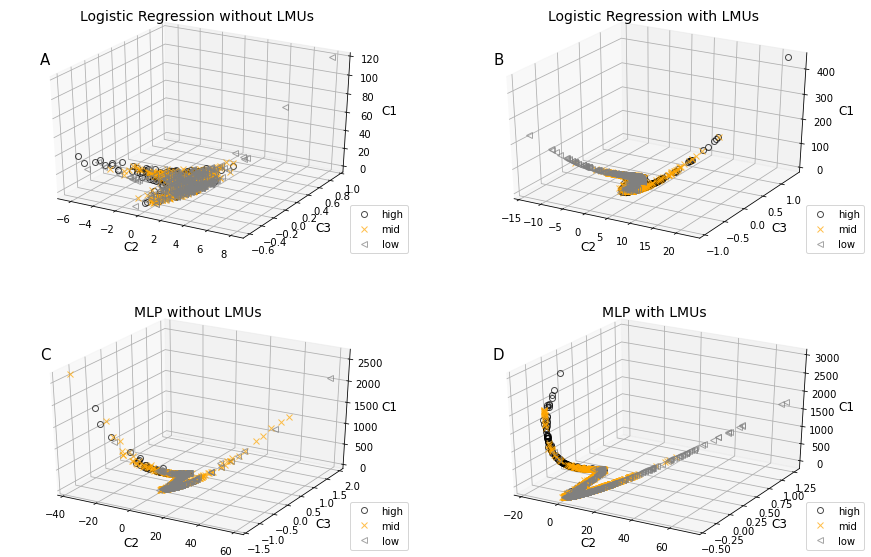

In [64]:
fig = plt.figure(figsize=(15, 10))
gs = gridspec.GridSpec(2,2)

ax1=fig.add_subplot(gs[0,0], projection='3d')
ax1.plot(lrrawpca_high[:,1],lrrawpca_high[:,2],lrrawpca_high[:,0], linestyle='none',alpha=0.7, marker='o',markeredgecolor='black',markerfacecolor='None',label='high')
ax1.plot(lrrawpca_mid[:,1],lrrawpca_mid[:,2],lrrawpca_mid[:,0], linestyle='none',alpha=0.7, marker='x',markeredgecolor='orange',markerfacecolor='None',label='mid')
ax1.plot(lrrawpca_low[:,1],lrrawpca_low[:,2],lrrawpca_low[:,0], linestyle='none',alpha=0.7, marker='<',markeredgecolor='grey',markerfacecolor='None',label='low')
ax1.set_xlabel('C2', fontsize=12)
ax1.set_ylabel('C3', fontsize=12)
ax1.set_zlabel('C1', fontsize=12)
ax1.legend(loc=(0.9,0))
ax1.set_title('Logistic Regression without LMUs', fontsize=14)

ax2=fig.add_subplot(gs[0,1], projection='3d')
ax2.plot(lrlmupca_high[:,1],lrlmupca_high[:,2],lrlmupca_high[:,0], linestyle='none',alpha=0.7, marker='o',markeredgecolor='black',markerfacecolor='None',label='high')
ax2.plot(lrlmupca_mid[:,1],lrlmupca_mid[:,2],lrlmupca_mid[:,0], linestyle='none',alpha=0.7, marker='x',markeredgecolor='orange',markerfacecolor='None',label='mid')
ax2.plot(lrlmupca_low[:,1],lrlmupca_low[:,2],lrlmupca_low[:,0], linestyle='none',alpha=0.7, marker='<',markeredgecolor='grey',markerfacecolor='None',label='low')
ax2.set_xlabel('C2', fontsize=12)
ax2.set_ylabel('C3', fontsize=12)
ax2.set_zlabel('C1', fontsize=12)
ax2.legend(loc=(0.9,0))
ax2.set_title('Logistic Regression with LMUs', fontsize=14)

ax3=fig.add_subplot(gs[1,0], projection='3d')
ax3.plot(mlprawpca_high[:,1],mlprawpca_high[:,2],mlprawpca_high[:,0], linestyle='none',alpha=0.7, marker='o',markeredgecolor='black',markerfacecolor='None',label='high')
ax3.plot(mlprawpca_mid[:,1],mlprawpca_mid[:,2],mlprawpca_mid[:,0], linestyle='none',alpha=0.7, marker='x',markeredgecolor='orange',markerfacecolor='None',label='mid')
ax3.plot(mlprawpca_low[:,1],mlprawpca_low[:,2],mlprawpca_low[:,0], linestyle='none',alpha=0.7, marker='<',markeredgecolor='grey',markerfacecolor='None',label='low')
ax3.set_xlabel('C2', fontsize=12)
ax3.set_ylabel('C3', fontsize=12)
ax3.set_zlabel('C1', fontsize=12)
ax3.legend(loc=(0.9,0))
ax3.set_title('MLP without LMUs', fontsize=14)

ax4=fig.add_subplot(gs[1,1], projection='3d')
ax4.plot(mlplmupca_high[:,1],mlplmupca_high[:,2],mlplmupca_high[:,0], linestyle='none',alpha=0.7, marker='o',markeredgecolor='black',markerfacecolor='None',label='high')
ax4.plot(mlplmupca_mid[:,1],mlplmupca_mid[:,2],mlplmupca_mid[:,0], linestyle='none',alpha=0.7, marker='x',markeredgecolor='orange',markerfacecolor='None',label='mid')
ax4.plot(mlplmupca_low[:,1],mlplmupca_low[:,2],mlplmupca_low[:,0], linestyle='none',alpha=0.7, marker='<',markeredgecolor='grey',markerfacecolor='None',label='low')
ax4.set_xlabel('C2', fontsize=12)
ax4.set_ylabel('C3', fontsize=12)
ax4.set_zlabel('C1', fontsize=12)
ax4.legend(loc=(0.9,0))
ax4.set_title('MLP with LMUs', fontsize=14)

fig.text(0.16, 0.8, 'A', ha='center', fontsize=15)
fig.text(0.58, 0.8, 'B', ha='center', fontsize=15)
fig.text(0.16, 0.39, 'C', ha='center', fontsize=15)
fig.text(0.58, 0.39, 'D', ha='center', fontsize=15)

fig.savefig('../Figs/engagement_pca.png')

**Flattening the Line** <br>
MLP approaches. <br>
Create new arrays of the 3 PCA component scores for each clip with clip label denoted as 0 = high, 1 = mid, and 2 = low.

In [65]:
a = np.zeros((mlprawpca_high.shape[0], 1))
x = np.hstack((mlprawpca_high, a))

a = np.zeros((mlprawpca_mid.shape[0], 1))
a = np.where(a==0, 1, a) 
y = np.hstack((mlprawpca_mid, a))

a = np.zeros((mlprawpca_low.shape[0], 1))
a = np.where(a==0, 2, a) 
z = np.hstack((mlprawpca_low, a))

mlprawpca_all = np.vstack((x,y,z))

In [66]:
a = np.zeros((mlplmupca_high.shape[0], 1))
x = np.hstack((mlplmupca_high, a))

a = np.zeros((mlplmupca_mid.shape[0], 1))
a = np.where(a==0, 1, a) 
y = np.hstack((mlplmupca_mid, a))

a = np.zeros((mlplmupca_low.shape[0], 1))
a = np.where(a==0, 2, a) 
z = np.hstack((mlplmupca_low, a))

mlplmupca_all = np.vstack((x,y,z))

Find the index for the clip with the highest score on the first component. 

In [67]:
print(np.where(mlprawpca_all[:,0] == np.amax(mlprawpca_all[:,0])))
print(np.where(mlplmupca_all[:,0] == np.amax(mlplmupca_all[:,0])))

(array([1227], dtype=int64),)
(array([357], dtype=int64),)


Define function for sorting the clips from the 3D line onto a flat line.

In [68]:
def sort_list(x, start_idx):
    
    sortme = copy.deepcopy(x)
    
    #We stretch out dimension 1 since this is the dimension in which the "knot" takes place
    sortme[:,1] = 100* sortme[:,1]
        
    start_point = sortme[start_idx,:]
    distances = np.inf*np.ones(np.size(sortme,0))
        
    for idx, row in enumerate(sortme):
        distances[idx] = np.linalg.norm(row[0:3]-start_point[0:3])  
            
    y = np.c_[sortme, distances]
    y = y[y[:,4].argsort()]

    y[:,1] = y[:,1]/100 #return to original coordinates
    
    #we want density plots to take into account the distance between individual points (rather than the distance from all points to the start point)
    for idx, row in enumerate(y):   
        if idx == 0:
            y[0,4] = 0
        else:
            y[idx,4] = np.linalg.norm(row[0:3]-y[idx-1,0:3])  

    return y

In [69]:
raw = sort_list(mlprawpca_all, 1227)
lmu = sort_list(mlplmupca_all, 357)

trajectory_indexes = np.cumsum(raw[:,4])
trajectory_indexes = trajectory_indexes/np.amax(trajectory_indexes)
classes = raw[:,3]

low_engagement_raw = trajectory_indexes[np.where(classes == 2)]
mid_engagement_raw = trajectory_indexes[np.where(classes == 1)]
high_engagement_raw = trajectory_indexes[np.where(classes == 0)]

trajectory_indexes = np.cumsum(lmu[:,4])
trajectory_indexes = trajectory_indexes/np.amax(trajectory_indexes)
classes = lmu[:,3]

low_engagement_lmu = trajectory_indexes[np.where(classes == 2)]
mid_engagement_lmu = trajectory_indexes[np.where(classes == 1)]
high_engagement_lmu = trajectory_indexes[np.where(classes == 0)]

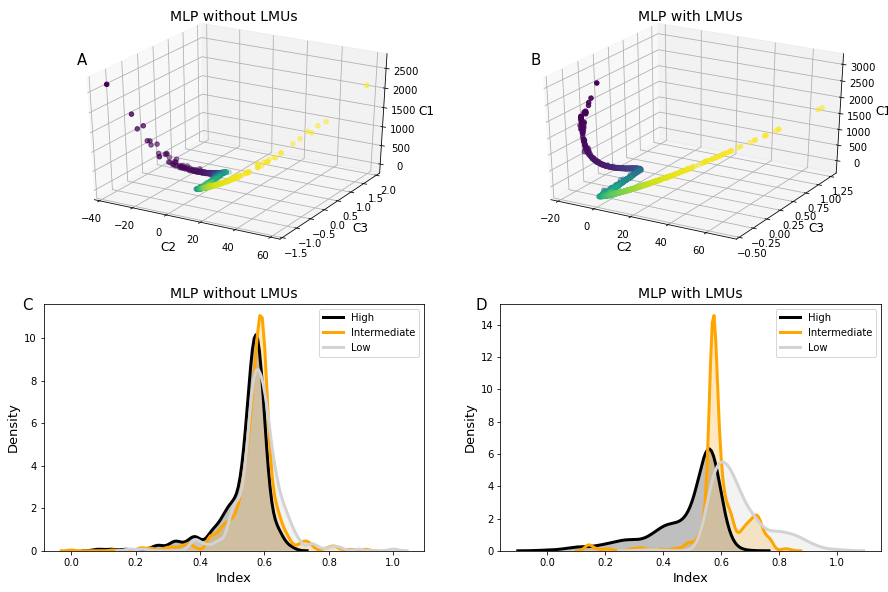

In [70]:
fig = plt.figure(figsize=(15, 10))
gs = gridspec.GridSpec(2,2)

ax1=fig.add_subplot(gs[0,0], projection='3d')#, facecolor='grey')
ax1.scatter(raw[:,1], raw[:,2], raw[:,0], c=range(np.size(raw,0)), cmap='viridis')
ax1.set_title('MLP without LMUs', fontsize=14)
ax1.set_xlabel('C2', fontsize=12)
ax1.set_ylabel('C3', fontsize=12)
ax1.set_zlabel('C1', fontsize=12)

ax2=fig.add_subplot(gs[0,1], projection='3d')#, facecolor='grey')
ax2.scatter(lmu[:,1], lmu[:,2], lmu[:,0], c=range(np.size(lmu,0)), cmap="viridis")
ax2.set_title('MLP with LMUs', fontsize=14)
ax2.set_xlabel('C2', fontsize=12)
ax2.set_ylabel('C3', fontsize=12)
ax2.set_zlabel('C1', fontsize=12)

ax3=fig.add_subplot(gs[1,0])
sns.distplot(high_engagement_raw, hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3}, label='High', ax=ax3, color='black')
sns.distplot(mid_engagement_raw, hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3}, label='Intermediate', ax=ax3, color='orange')
sns.distplot(low_engagement_raw, hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3}, label='Low', ax=ax3, color='lightgrey')
ax3.set_title('MLP without LMUs', fontsize=14)
ax3.set_xlabel('Index', fontsize=13)
ax3.set_ylabel('Density', fontsize=13)

ax4=fig.add_subplot(gs[1,1])
sns.distplot(high_engagement_lmu, hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3}, label='High', ax=ax4, color='black'), 
sns.distplot(mid_engagement_lmu, hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3}, label='Intermediate', ax=ax4, color='orange')
sns.distplot(low_engagement_lmu, hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3}, label='Low', ax=ax4, color='lightgrey')
ax4.set_title('MLP with LMUs', fontsize=14)
ax4.set_xlabel('Index', fontsize=13)
ax4.set_ylabel('Density', fontsize=13)

fig.text(0.16, 0.8, 'A', ha='center', fontsize=15)
fig.text(0.58, 0.8, 'B', ha='center', fontsize=15)
fig.text(0.11, 0.46, 'C', ha='center', fontsize=15)
fig.text(0.53, 0.46, 'D', ha='center', fontsize=15)

fig.savefig('../Figs/flatten_pca.png')

**Effect of Classifier and Pre-processing on kNN performance**

In [71]:
lrr_kNNscores=pd.DataFrame(lrr_scores)
lrr_kNNscores['classifier']='classifier1'
lrr_kNNscores['preprocess']='preprocess1'

lrl_kNNscores=pd.DataFrame(lrl_scores)
lrl_kNNscores['classifier']='classifier1'
lrl_kNNscores['preprocess']='preprocess2'

mlpr_kNNscores=pd.DataFrame(mlpr_scores)
mlpr_kNNscores['classifier']='classifier2'
mlpr_kNNscores['preprocess']='preprocess1'

mlpl_kNNscores=pd.DataFrame(mlpl_scores)
mlpl_kNNscores['classifier']='classifier2'
mlpl_kNNscores['preprocess']='preprocess2'

In [72]:
stacked_data=lrr_kNNscores.append(lrl_kNNscores)
stacked_data=stacked_data.append(mlpr_kNNscores)
stacked_data=stacked_data.append(mlpl_kNNscores)

stacked_data = stacked_data.rename(columns={0:'result'})

Create ANOVA model

In [73]:
results = ols('result ~ classifier*preprocess', stacked_data).fit()

**Assumption Checks**

Shapiro's test for normality - testing the residuals. If not significant the residuals are normally distributed.

In [74]:
stats.shapiro(results.resid)

(0.9837253093719482, 0.40415093302726746)

Bartlett's test for equal variances between groups. If not significant the groups have equal variances.

In [75]:
stats.bartlett(stacked_data['result'][(stacked_data['classifier'] == 'classifier1') & (stacked_data['preprocess'] == 'preprocess1')],
             stacked_data['result'][(stacked_data['classifier'] == 'classifier1') & (stacked_data['preprocess'] == 'preprocess2')],
             stacked_data['result'][(stacked_data['classifier'] == 'classifier2') & (stacked_data['preprocess'] == 'preprocess1')],
             stacked_data['result'][(stacked_data['classifier'] == 'classifier2') & (stacked_data['preprocess'] == 'preprocess2')])

BartlettResult(statistic=2.741905796025186, pvalue=0.43315275300335976)

**Two-way ANOVA**

In [76]:
rp.summary_cont(stacked_data.groupby(['classifier']))['result']

,N,Mean,SD,SE,95% Conf.,Interval
classifier,,,,,,
classifier1,40,0.5866,0.0630,0.0100,0.5664,0.6067
classifier2,40,0.5833,0.0766,0.0121,0.5588,0.6078


In [77]:
rp.summary_cont(stacked_data.groupby(['preprocess']))['result']

,N,Mean,SD,SE,95% Conf.,Interval
preprocess,,,,,,
preprocess1,40,0.5593,0.0727,0.0115,0.5360,0.5825
preprocess2,40,0.6106,0.0567,0.0090,0.5925,0.6288


In [78]:
rp.summary_cont(stacked_data.groupby(['classifier', 'preprocess']))['result']

N    Mean      SD      SE  95% Conf.  Interval
classifier  preprocess                                                  
classifier1 preprocess1  20  0.5713  0.0664  0.0149     0.5402    0.6024
            preprocess2  20  0.6019  0.0568  0.0127     0.5752    0.6285
classifier2 preprocess1  20  0.5472  0.0782  0.0175     0.5106    0.5838
            preprocess2  20  0.6194  0.0565  0.0126     0.5930    0.6459

In [79]:
aov_table = sm.stats.anova_lm(results, typ=2)

def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']
    
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
    
    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

anova_table(aov_table)

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
classifier,0.000210,1.0,0.000210,0.049550,0.824445,0.000547,-0.010381
preprocess,0.052816,1.0,0.052816,12.459365,0.000710,0.137586,0.125161
classifier:preprocess,0.008681,1.0,0.008681,2.047741,0.156531,0.022613,0.011444
Residual,0.322171,76.0,0.004239,NaN,NaN,NaN,NaN
